# Lending club case study

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:,.2f}'.format 

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### Data retrieve
Printing the head (5 rows) of the loan csv

In [2]:
# Reading the CSV file from the storage
loan_df = pd.read_csv("loan.csv")

# Printing the head of the CSV
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.

#### Shape and number of unique values in each column

In [3]:
# Printing the shape of the dataFrame
print(loan_df.shape)

# Find out how many unique values are available in each column to understand the categorisation possibility
loan_df.nunique()

(39717, 111)


id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

#### Find out the null value % in each column
Maintain a list of coumns with null % more than 40

In [4]:
# print(100 * loan_df.isnull().mean())
columnsWithMoreThanFortyPercentNullValues = []
for col in loan_df.columns:
    percentage = 100 * loan_df[col].isnull().mean()
    if percentage > 40:
        columnsWithMoreThanFortyPercentNullValues.append(col)
        print(col, "\t:\t", percentage)

print(len(columnsWithMoreThanFortyPercentNullValues))

mths_since_last_delinq 	:	 64.66248709620565
mths_since_last_record 	:	 92.98537150338646
next_pymnt_d 	:	 97.12969257496789
mths_since_last_major_derog 	:	 100.0
annual_inc_joint 	:	 100.0
dti_joint 	:	 100.0
verification_status_joint 	:	 100.0
tot_coll_amt 	:	 100.0
tot_cur_bal 	:	 100.0
open_acc_6m 	:	 100.0
open_il_6m 	:	 100.0
open_il_12m 	:	 100.0
open_il_24m 	:	 100.0
mths_since_rcnt_il 	:	 100.0
total_bal_il 	:	 100.0
il_util 	:	 100.0
open_rv_12m 	:	 100.0
open_rv_24m 	:	 100.0
max_bal_bc 	:	 100.0
all_util 	:	 100.0
total_rev_hi_lim 	:	 100.0
inq_fi 	:	 100.0
total_cu_tl 	:	 100.0
inq_last_12m 	:	 100.0
acc_open_past_24mths 	:	 100.0
avg_cur_bal 	:	 100.0
bc_open_to_buy 	:	 100.0
bc_util 	:	 100.0
mo_sin_old_il_acct 	:	 100.0
mo_sin_old_rev_tl_op 	:	 100.0
mo_sin_rcnt_rev_tl_op 	:	 100.0
mo_sin_rcnt_tl 	:	 100.0
mort_acc 	:	 100.0
mths_since_recent_bc 	:	 100.0
mths_since_recent_bc_dlq 	:	 100.0
mths_since_recent_inq 	:	 100.0
mths_since_recent_revol_delinq 	:	 100.0
num_acct

#### Drop columns with null percentage of more than 40%

In [5]:
loan_df = loan_df.dropna(thresh=0.4 * loan_df.shape[0], axis=1)
print(loan_df.shape)

(39717, 54)


Recheck the null column with percentage. This time printing all columns with percentage more 0

In [6]:
for col in loan_df.columns:
    percentage = 100 * loan_df[col].isnull().mean()
    if percentage > 0:
        print(col, "\t:\t", percentage)

emp_title 	:	 6.191303472064859
emp_length 	:	 2.7066495455346575
desc 	:	 32.58050708764509
title 	:	 0.027695948838029054
revol_util 	:	 0.12589067653649572
last_pymnt_d 	:	 0.1787647606818239
last_credit_pull_d 	:	 0.0050356270614598285
collections_12_mths_ex_med 	:	 0.1409975577208752
chargeoff_within_12_mths 	:	 0.1409975577208752
pub_rec_bankruptcies 	:	 1.7549160309187504
tax_liens 	:	 0.09819472769846666


#### Find columns with just one unique value

In [7]:
# Find out how many unique values are available in each column to understand the categorisation possibility
columnsWithOneUniqueValue = []
for col in loan_df.columns:
    unique_count = loan_df[col].nunique()
    if unique_count == 1:
        columnsWithOneUniqueValue.append(col)
print(columnsWithOneUniqueValue)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


#### Some columns are having only one value so they won't be of any use to us as the value is not varying at all
Drop such columns from the table

In [8]:
loan_df = loan_df.drop(columnsWithOneUniqueValue, axis=1)
print(loan_df.shape)
loan_df.head()

(39717, 45)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16,0.00


#### Understand the values in the columns

In [9]:
# Describe the values
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,"39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,020.00"
mean,"683,131.91","850,463.56","11,219.44","10,947.71","10,397.45",324.56,"68,968.93",13.32,0.15,0.87,9.29,0.06,"13,382.53",22.09,51.23,50.99,"12,153.60","11,567.15","9,793.35","2,263.66",1.36,95.22,12.41,"2,678.83",0.04
std,"210,694.13","265,678.31","7,456.67","7,187.24","7,128.45",208.87,"63,793.77",6.68,0.49,1.07,4.40,0.24,"15,885.02",11.40,375.17,373.82,"9,042.04","8,942.67","7,065.52","2,608.11",7.29,688.74,148.67,"4,447.14",0.20
min,"54,734.00","70,699.00",500.00,500.00,0.00,15.69,"4,000.00",0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"516,221.00","666,780.00","5,500.00","5,400.00","5,000.00",167.02,"40,404.00",8.17,0.00,0.00,6.00,0.00,"3,703.00",13.00,0.00,0.00,"5,576.93","5,112.31","4,600.00",662.18,0.00,0.00,0.00,218.68,0.00
50%,"665,665.00","850,812.00","10,000.00","9,600.00","8,975.00",280.22,"59,000.00",13.40,0.00,1.00,9.00,0.00,"8,850.00",20.00,0.00,0.00,"9,899.64","9,287.15","8,000.00","1,348.91",0.00,0.00,0.00,546.14,0.00
75%,"837,755.00","1,047,339.00","15,000.00","15,000.00","14,400.00",430.78,"82,300.00",18.60,0.00,1.00,12.00,0.00,"17,058.00",29.00,0.00,0.00,"16,534.43","15,798.81","13,653.26","2,833.40",0.00,0.00,0.00,"3,293.16",0.00
max,"1,077,501.00","1,314,167.00","35,000.00","35,000.00","35,000.00","1,305.19","6,000,000.00",29.99,11.00,8.00,44.00,4.00,"149,588.00",90.00,"6,311.47","6,307.37","58,563.68","58,563.68","35,000.02","23,563.68",180.20,"29,623.35","7,002.19","36,115.20",2.00


#### Segregating columns in categories
Dropping columns that will not help in analysis
- "id", "member_id", "url", "desc", "title", "zip_code", "emp_title", 
              "total_rec_late_fee", "last_pymnt_amnt", "last_credit_pull_d",
             "collection_recovery_fee", "last_pymnt_d"

In [10]:
extra_cols = ["id", "member_id", "url", "desc", "title", "zip_code", "emp_title", 
              "total_rec_late_fee", "last_pymnt_amnt", "last_credit_pull_d",
             "collection_recovery_fee", "last_pymnt_d"]
loan_df = loan_df.drop(extra_cols,axis=1)
print(loan_df.shape)

(39717, 33)


#### Segregating columns in categories

In [11]:
# cat_cols = ["term", "int_rate", "grade", "sub_grade", "emp_length", 
#             "home_ownership", "verification_status", "loan_status",
#            "purpose", "addr_state", "delinq_2yrs", "inq_last_6mths", "open_acc",
#            "pub_rec", "pub_rec_bankruptcies"]
# # emp_title
# other_columns = set(loan_df.columns.values) - set(cat_cols)


#### Dropping the repeat columns

In [12]:
repeat_columns = ["funded_amnt_inv", "out_prncp_inv", "total_pymnt_inv"]
loan_df = loan_df.drop(repeat_columns, axis=1)
loan_df.shape

(39717, 30)

#### Print the columns with null % more than 0
- Printing the mode value for each column

In [14]:
columnsWtihNullValues_second = []
for col in loan_df.columns:
    total_null_values = loan_df[col].isnull().sum()
    percentage = 100 * loan_df[col].isnull().mean()
    if percentage > 0:
        columnsWtihNullValues_second.append(col)
        print(col, "\t:\t", percentage, total_null_values)
        print(loan_df[col].value_counts().head(1))
        print((loan_df[col].value_counts().head(1) / len(loan_df[col])) * 100)
        print("---------------")

print(len(columnsWtihNullValues_second))

emp_length 	:	 2.7066495455346575 1075
10+ years    8879
Name: emp_length, dtype: int64
10+ years   22.36
Name: emp_length, dtype: float64
---------------
revol_util 	:	 0.12589067653649572 50
0%    977
Name: revol_util, dtype: int64
0%   2.46
Name: revol_util, dtype: float64
---------------
pub_rec_bankruptcies 	:	 1.7549160309187504 697
0.00    37339
Name: pub_rec_bankruptcies, dtype: int64
0.00   94.01
Name: pub_rec_bankruptcies, dtype: float64
---------------
3


#### Handling null values
- Only 3% null values in emp_title and 22% of the total records are 10+ years so filling the null values with mode
- only 0.1% null values in revol_util but mode is only 2.4% hence not replacing the value and dropping it instead
- Only 2% pub_rec_bankruptcies are null and 94% are 0 value hence replacing with mode

In [15]:
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True)
loan_df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_df.pub_rec_bankruptcies.fillna(loan_df.pub_rec_bankruptcies.mode()[0], inplace = True)

In [150]:
print(loan_df.emp_length.isna().sum(), 
      loan_df.revol_util.isna().sum(), 
      loan_df.pub_rec_bankruptcies.isna().sum())

print("_________________________")
print(loan_df.info())

loan_df.describe()

0 0 0
_________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 37825 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37825 non-null  int64  
 1   funded_amnt           37825 non-null  int64  
 2   term                  37825 non-null  object 
 3   int_rate              37825 non-null  float64
 4   installment           37825 non-null  float64
 5   grade                 37825 non-null  object 
 6   sub_grade             37825 non-null  object 
 7   emp_length            37825 non-null  int64  
 8   home_ownership        37825 non-null  object 
 9   annual_inc            37825 non-null  float64
 10  verification_status   37825 non-null  object 
 11  issue_d               37825 non-null  object 
 12  loan_status           37825 non-null  object 
 13  purpose               37825 non-null  object 
 14  addr_state            37825 non-null  

,loan_amnt,funded_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,recoveries,pub_rec_bankruptcies
count,"37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00"
mean,"10,877.10","10,622.06",11.97,314.73,5.08,"61,392.18",13.49,0.14,0.86,9.20,0.06,"12,463.91",48.78,21.72,48.52,"11,751.21","9,480.43","2,176.99",92.45,0.04
std,"7,174.04","6,915.94",3.70,200.10,3.60,"28,198.81",6.67,0.49,1.06,4.35,0.24,"13,867.71",28.26,11.22,360.16,"8,661.36","6,778.24","2,490.53",671.61,0.20
min,500.00,500.00,5.42,15.69,0.00,"4,000.00",0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"5,125.00","5,000.00",8.94,164.08,2.00,"40,000.00",8.39,0.00,0.00,6.00,0.00,"3,629.00",25.50,13.00,0.00,"5,493.87","4,500.00",646.69,0.00,0.00
50%,"9,600.00","9,300.00",11.83,273.79,4.00,"56,400.00",13.62,0.00,1.00,8.00,0.00,"8,629.00",49.20,20.00,0.00,"9,609.55","8,000.00","1,309.06",0.00,0.00
75%,"15,000.00","14,725.00",14.46,413.53,9.00,"78,000.00",18.76,0.00,1.00,12.00,0.00,"16,350.00",72.20,28.00,0.00,"15,952.46","13,000.00","2,718.87",0.00,0.00
max,"35,000.00","35,000.00",24.40,"1,305.19",10.00,"145,008.00",29.99,11.00,8.00,44.00,4.00,"149,000.00",99.90,90.00,"6,311.47","58,563.68","35,000.02","23,563.68","29,623.35",2.00


### Standardizing the values in the columns
- Remove the % from the int_rate
- Remove the % from the revol_util
- Remove years from emp_length and treat <1 as 0 and 10+ as 10
- Convert all above columns to numeric types

In [17]:
loan_df.revol_util = pd.to_numeric(loan_df["revol_util"].str.rstrip("%"))
loan_df.int_rate = pd.to_numeric(loan_df["int_rate"].str.rstrip("%"))
loan_df.emp_length = pd.to_numeric(loan_df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

### Handling date column by dividing in month and year

In [20]:
date_month_df = loan_df.issue_d.str.partition("-")
loan_df["issue_m"] = date_month_df[0]
loan_df["issue_y"] = date_month_df[2]
loan_df[["issue_m", "issue_y"]].head()

,issue_m,issue_y
0,Dec,11
1,Dec,11
2,Dec,11
3,Dec,11
4,Dec,11


### Home ownership -> replacing None with Other

In [74]:
loan_df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

### Loan status of users

Fully paid 	 82.89
Charged Off 	 14.32
Current 	 2.79


<Axes: xlabel='loan_status', ylabel='count'>

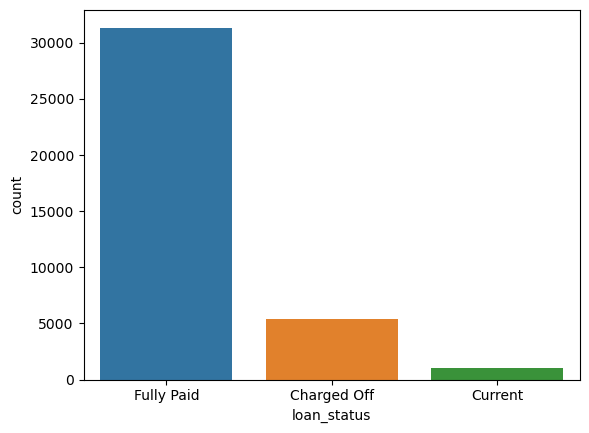

In [158]:
fully_paid_percent = round((len(loan_df[loan_df["loan_status"] == "Fully Paid"]) / len(loan_df)) * 100, 2)
charged_off_percent = round((len(loan_df[loan_df["loan_status"] == "Charged Off"]) / len(loan_df)) * 100, 2)
current_percent = round((len(loan_df[loan_df["loan_status"] == "Current"]) / len(loan_df)) * 100, 2)
print("Fully paid \t", fully_paid_percent)
print("Charged Off \t", charged_off_percent)
print("Current \t", current_percent)
sns.countplot(x="loan_status", data=loan_df)

_________
### Removing the outliers

#### Analysing the annual_inc

count      39,667.00
mean       68,999.52
std        63,789.47
min         4,000.00
25%        40,516.32
50%        59,000.00
75%        82,400.00
max     6,000,000.00
Name: annual_inc, dtype: float64


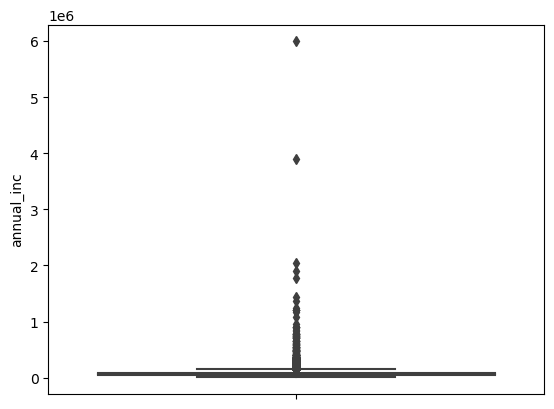

In [22]:
# Starting with annual_inc

print(loan_df["annual_inc"].describe())
sns.boxplot(y=loan_df["annual_inc"])
plt.show()

#### Function to remove outliers

In [23]:
# Function to remove outliers
def findTheOutlierHighAndLow(dataFrame, columnName):
    columnValue = dataFrame[columnName]
    columnQ1 = columnValue.quantile(0.25)
    columnQ3 = columnValue.quantile(0.75)
    columnIQR = columnQ3 - columnQ1
    columnHighIQR = columnQ3 + (1.5 * columnIQR)
    columnLowIQR = columnQ1 - (1.5 * columnIQR)
    return (columnLowIQR, columnHighIQR)

#### Function to draw boxplot side by side

In [24]:
# Function to subplot draw boxplot
def drawBoxPlot(dataFrame, column, fullTitle, leftTitle, rightTitle):
    charged_off_users = loan_without_current_df[dataFrame["loan_status"] == "Charged Off"]
    fully_paid_users = loan_without_current_df[dataFrame["loan_status"] == "Fully Paid"]

    fig, axes = plt.subplots(1, 2, figsize=(14,5))
    fig.suptitle(fullTitle)

    axes[0].set_title(leftTitle)
    sns.boxplot(ax=axes[0], y=column, data=fully_paid_users)


    axes[1].set_title(rightTitle)
    sns.boxplot(ax=axes[1], y=column, data=charged_off_users)

In [212]:
def drawSubCountPlot(dataFrame1, dataFrame2, column, 
                     hueColumn, fullTitle, leftTitle, rightTitle):
    fig, axes = plt.subplots(1, 2, figsize=(14,5))
    fig.suptitle(fullTitle)

    axes[0].set_title(leftTitle)
    sns.countplot(ax=axes[0], x=column, data=dataFrame1, hue=hueColumn)
    percentage_above_bar_relative_to_xgroup(axes[0])


    axes[1].set_title(rightTitle)
    sns.countplot(ax=axes[1], x=column, data=dataFrame2)

In [271]:
def drawSubBarGraphXY(dataFrame1, dataFrame2, column1, column2, 
                     hueColumn, fullTitle, leftTitle, rightTitle):
    fig, axes = plt.subplots(1, 2, figsize=(14,5))
    fig.suptitle(fullTitle)

    axes[0].set_title(leftTitle)
    sns.barplot(ax=axes[0], x=column1, y=column2, data=dataFrame1, hue=hueColumn)
    percentage_above_bar_relative_to_xgroup(axes[0])


    axes[1].set_title(rightTitle)
    sns.barplot(ax=axes[1], x=column1, y=column2, data=dataFrame2)

In [237]:
def drawBoxPlotXY(dataFrame1, column1, column2, 
                     hueColumn, fullTitle, leftTitle, rightTitle):
    plt.figure(figsize=(14,5))
    sns.boxplot(x=column1, y=column2, data=dataFrame1, hue=hueColumn)
    plt.show()

In [238]:
def drawSubBoxPlotXY(dataFrame1, dataFrame2, column1, column2, 
                     hueColumn, fullTitle, leftTitle, rightTitle):
    fig, axes = plt.subplots(1, 2, figsize=(14,5))
    fig.suptitle(fullTitle)

    axes[0].set_title(leftTitle)
    sns.boxplot(ax=axes[0], x=column1, y=column2, data=dataFrame1, hue=hueColumn)


    axes[1].set_title(rightTitle)
    sns.boxplot(ax=axes[1], x=column1, y=column2, data=dataFrame2)

In [25]:
# Create hue with %
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

In [26]:
annual_inc_low_iqr, annual_inc_high_iqr = findTheOutlierHighAndLow(loan_df, "annual_inc")
print("Annual income High IQR", annual_inc_high_iqr)
print("Annual income Low IQR",  annual_inc_low_iqr)
annual_inc_quantile_info = loan_df.annual_inc.quantile([0.50,0.75, 0.80, 0.85, 0.90, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
annual_inc_quantile_info

Annual income High IQR 145225.52000000002
Annual income Low IQR -22309.200000000004


0.50      59,000.00
0.75      82,400.00
0.80      90,000.00
0.85     100,000.00
0.90     116,000.00
0.94     135,000.00
0.95     142,000.00
0.96     150,000.00
0.97     165,996.00
0.98     187,000.00
0.99     234,997.36
1.00   6,000,000.00
Name: annual_inc, dtype: float64

#### Removing the outliers from the annual_inc

In [27]:
loan_df = loan_df[loan_df["annual_inc"] < annual_inc_high_iqr]
loan_df.shape

(37825, 32)

In [28]:
loan_without_current_df = loan_df[loan_df["loan_status"] != "Current"]
loan_without_current_df.shape

(36768, 32)

#### Comparing the annual_inc of charged_Off users vs paid users

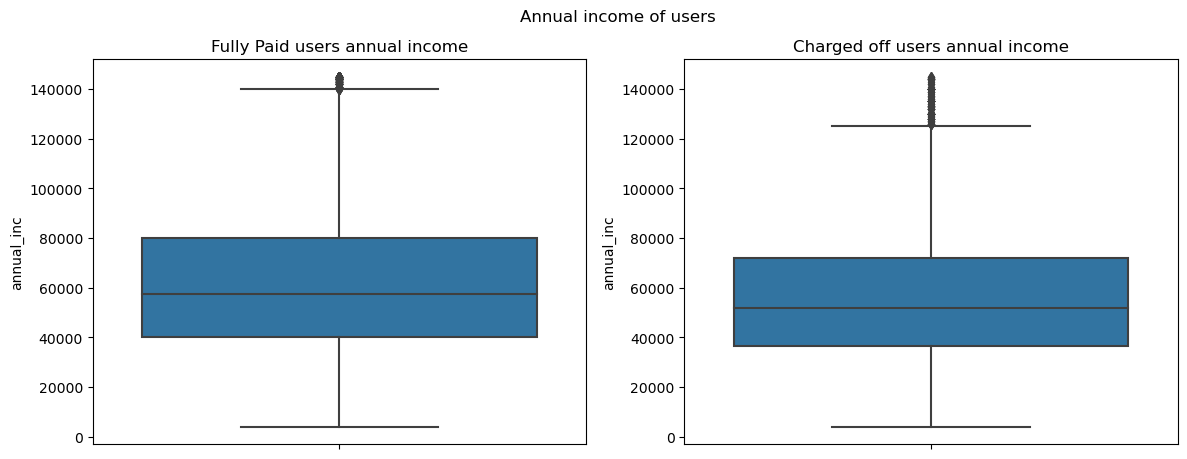

In [29]:
drawBoxPlot(loan_without_current_df, "annual_inc", 
            "Annual income of users", 
            "Fully Paid users annual income", 
            "Charged off users annual income")

# sns.histplot(x="annual_inc", data=loan_without_current_df)

#### loan amount analysis

In [30]:
loan_amount_low_outlier, loan_amount_high_outlier = findTheOutlierHighAndLow(loan_without_current_df, "loan_amnt")
print("Low - ", loan_amount_low_outlier, "| High - ", loan_amount_high_outlier)
loan_amount_quantile_info = loan_df.loan_amnt.quantile([0.50,0.75, 0.80, 0.85, 0.90, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(loan_amount_quantile_info)

loan_amount_df = loan_without_current_df["loan_amnt"]
loan_amount_df.describe()

Low -  -10000.0 | High -  30000.0
0.50    9,600.00
0.75   15,000.00
0.80   16,000.00
0.85   18,800.00
0.90   20,675.00
0.94   25,000.00
0.95   25,000.00
0.96   25,000.00
0.97   27,250.00
0.98   30,000.00
0.99   35,000.00
1.00   35,000.00
Name: loan_amnt, dtype: float64


count   36,768.00
mean    10,714.75
std      7,068.02
min        500.00
25%      5,000.00
50%      9,250.00
75%     15,000.00
max     35,000.00
Name: loan_amnt, dtype: float64

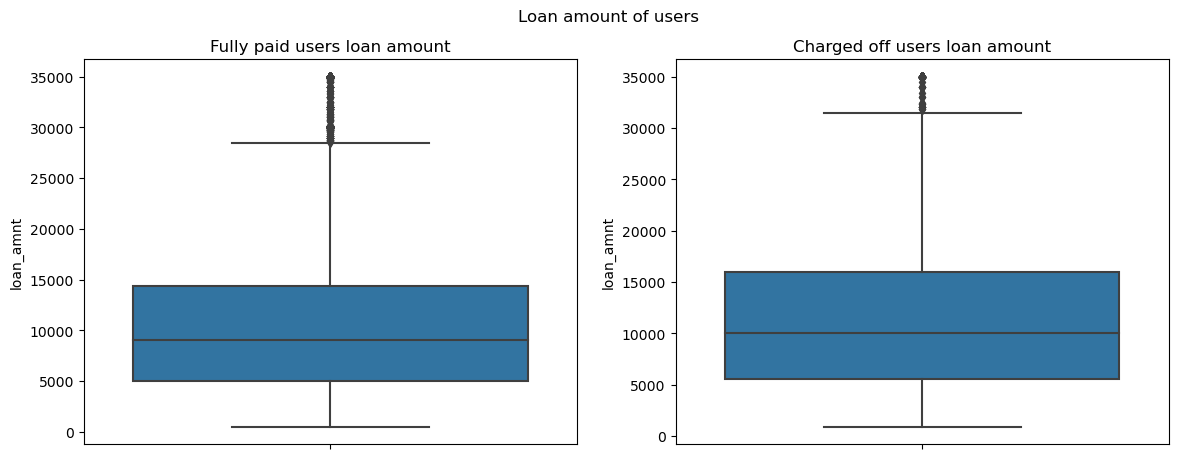

In [31]:
drawBoxPlot(loan_without_current_df, "loan_amnt", 
            "Loan amount of users", 
            "Fully paid users loan amount", 
            "Charged off users loan amount")

### Creating the bins for the columns with very high variance

In [33]:
loan_without_current_df["annual_inc_bins"] = pd.cut(loan_without_current_df["annual_inc"], bins=5, 
                                                    precision =0, labels=['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

loan_without_current_df["int_rate_bins"] = pd.cut(loan_without_current_df["int_rate"], bins=5,
                                                  precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

loan_without_current_df["open_acc_bins"] = pd.cut(loan_without_current_df["open_acc"], bins=5,
                                                  precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])

loan_without_current_df["revol_util_bins"] = pd.cut(loan_without_current_df["revol_util"], bins=5,
                                                  precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])

loan_without_current_df["total_acc_bins"] = pd.cut(loan_without_current_df["total_acc"], bins=5,
                                                  precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])

loan_without_current_df["loan_amnt_bins"] = pd.cut(loan_without_current_df["loan_amnt"], 
                                                    bins=5, 
                                                    precision =0,
                                                    labels=['0k-8k','8k-16k','16k-24k','24k-32k','32k-40k'])

loan_without_current_df["dti_bins"] = pd.cut(loan_without_current_df["dti"], 
                                                    bins=5, 
                                                    precision =0,
                                                    labels=['0-6','6-12','12-18','18-24','24-30'])
loan_without_current_df["installment_bins"] = pd.cut(loan_without_current_df["installment"], 
                                                    bins=5, 
                                                    precision =0,
                                                    labels=['0-262','262-524','524-786','786-1048','1048-1310'])
loan_without_current_df[["annual_inc_bins", "int_rate_bins", 
                         "open_acc_bins", "revol_util_bins", 
                         "total_acc_bins", "loan_amnt_bins",
                         "dti_bins", "installment_bins"]].head()

,annual_inc_bins,int_rate_bins,open_acc_bins,revol_util_bins,total_acc_bins,loan_amnt_bins,dti_bins,installment_bins
0,3k-31k,9%-13%,2-10,80-100,2-20,0k-8k,24-30,0-262
1,3k-31k,13%-17%,2-10,0-20,2-20,0k-8k,0-6,0-262
2,3k-31k,13%-17%,2-10,80-100,2-20,0k-8k,6-12,0-262
3,31k-58k,13%-17%,2-10,20-40,20-37,8k-16k,18-24,262-524
5,31k-58k,5%-9%,2-10,20-40,2-20,0k-8k,6-12,0-262


## Part 1: Univariate analysis of Charged Off users vs Fully Paid users

#### Annual income univariate analysis (comparing fully paid users to charged off users)
- The percentage ratio is more when the annual income is less
- Observing a negative correlation between annual income and the percentage of charged off users when compared to fully paid users
- The highest charged off users percentage when the annual income is lowest (3k-31k)
- Based on loan approvals, highest number of defaulters are when annual income is between 31k-58k

<Axes: title={'center': 'Annual income of only charged off users'}, xlabel='annual_inc_bins', ylabel='count'>

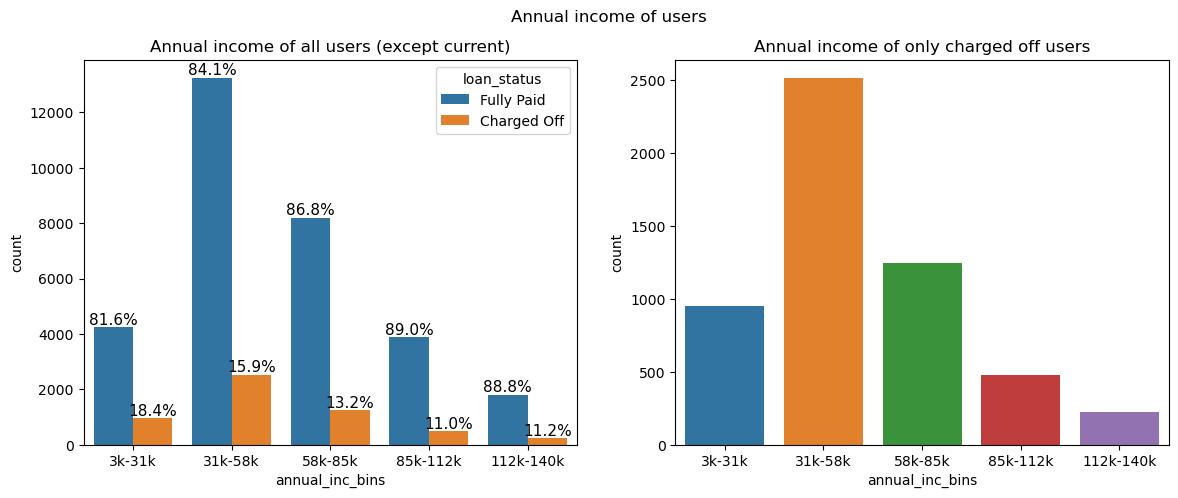

In [205]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle("Annual income of users")

axes[0].set_title("Annual income of all users (except current)")
sns.countplot(ax=axes[0], x="annual_inc_bins", data=loan_without_current_df, hue="loan_status")
percentage_above_bar_relative_to_xgroup(axes[0])


axes[1].set_title("Annual income of only charged off users")
sns.countplot(ax=axes[1], x="annual_inc_bins", data=charged_off_users)

#### Interest rates univariate analysis (comparing fully paid users to charged off users)
- The defaulter percentage ratio is more when the interest rate is more
- Observing a positive correlation between the defaulter percentage to the interest rates
- The ratio of defaulters to fully paid users is highest when the interest rate is be 21-24%
- The number of defaulters is highest when interest was between 13-17% as more loan is provided on this rate

<Axes: title={'center': 'Interest rates of only charged off users'}, xlabel='int_rate_bins', ylabel='count'>

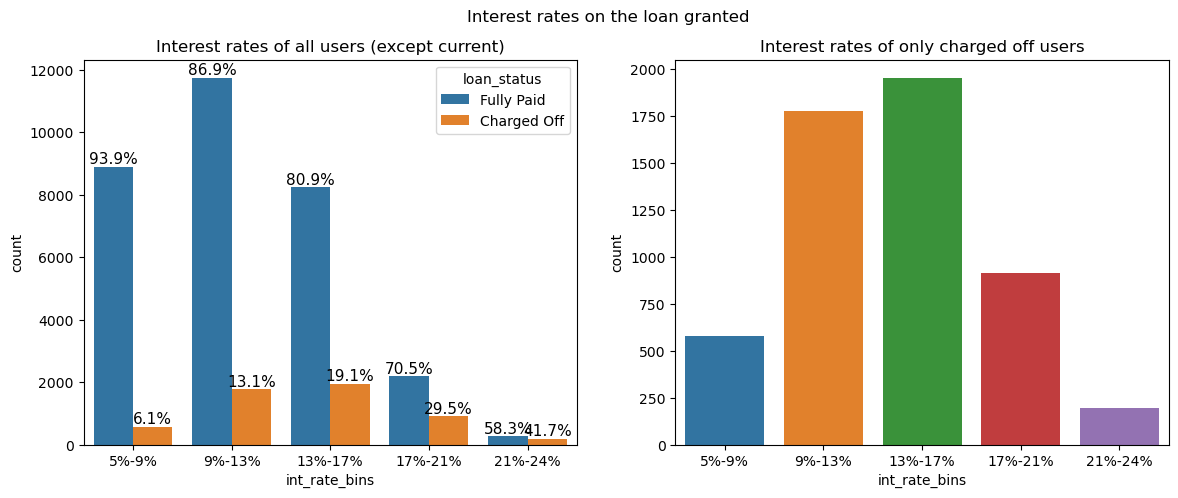

In [206]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle("Interest rates on the loan granted")

axes[0].set_title("Interest rates of all users (except current)")
sns.countplot(ax=axes[0], x="int_rate_bins", data=loan_without_current_df, hue="loan_status")
percentage_above_bar_relative_to_xgroup(axes[0])


axes[1].set_title("Interest rates of only charged off users")
sns.countplot(ax=axes[1], x="int_rate_bins", data=charged_off_users)

#### User open accounts  (comparing fully paid users to charged off users)
- The highest ratio percentage of defaulters (21%) is when the open accounts are between 27-36
- Other than that, the defaulter percentage is revolving between 14-16 %
- The highest count of defaulters is when open account is between 2-10 as loan approved is more

<Axes: title={'center': 'User open accounts (only charged off users)'}, xlabel='open_acc_bins', ylabel='count'>

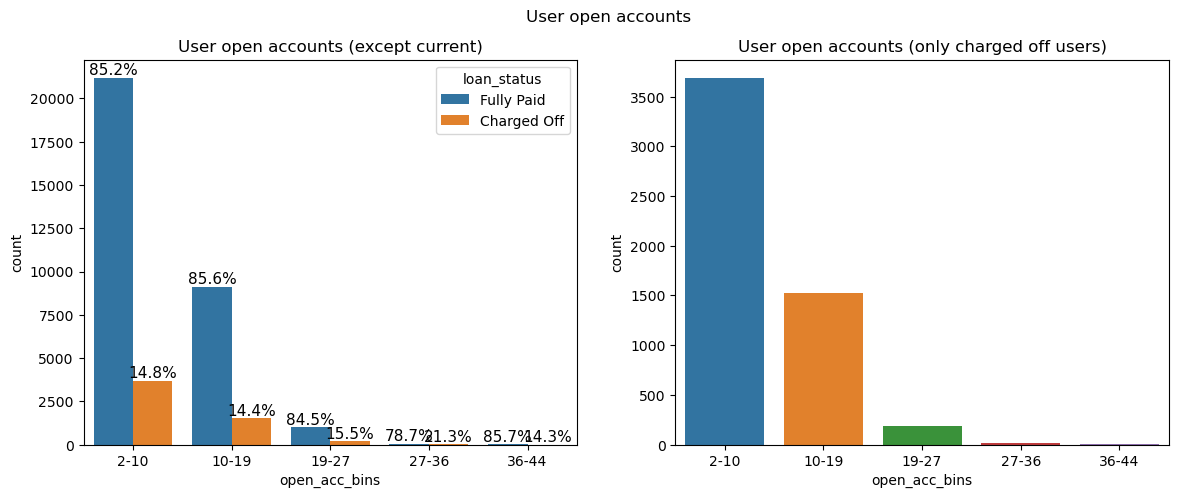

In [208]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle("User open accounts")

axes[0].set_title("User open accounts (except current)")
sns.countplot(ax=axes[0], x="open_acc_bins", data=loan_without_current_df, hue="loan_status")
percentage_above_bar_relative_to_xgroup(axes[0])


axes[1].set_title("User open accounts (only charged off users)")
sns.countplot(ax=axes[1], x="open_acc_bins", data=charged_off_users)

#### Revolving line utilization rate (comparing fully paid users to charged off users)
- As the amount of credit increases, the percentage of defaulter also increases
- We observe a direct correlation between the loan defaults and revolving line utilization rate
- The highest ratio percentage of defaulter is when revolving line utilization rate are between 80-100
- The defaulter count is highest when revolving line utilization rate are between 60-100

<Axes: title={'center': 'only charged off users'}, xlabel='revol_util_bins', ylabel='count'>

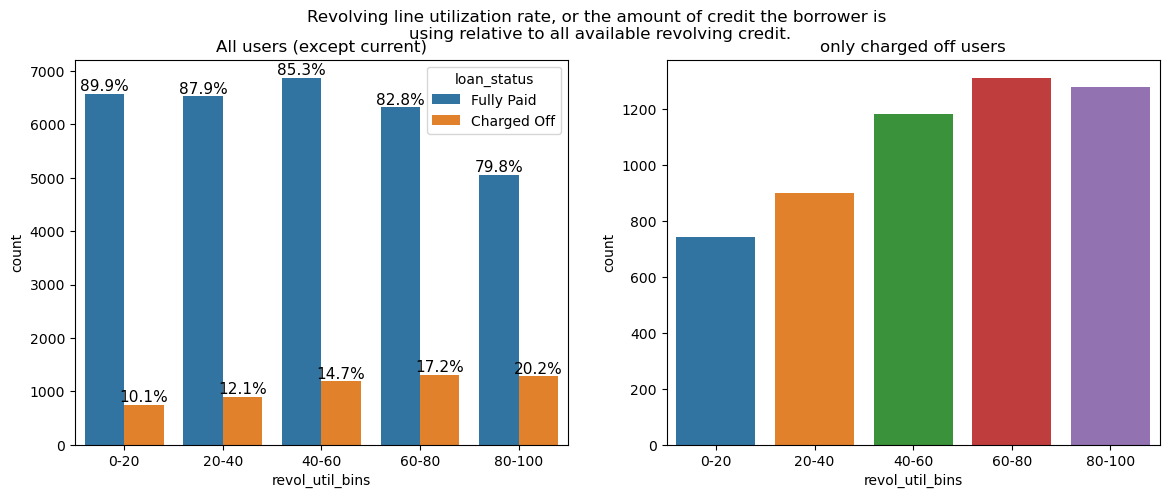

In [209]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle("Revolving line utilization rate, or the amount of credit the borrower is \nusing relative to all available revolving credit.")

axes[0].set_title("All users (except current)")
sns.countplot(ax=axes[0], x="revol_util_bins", data=loan_without_current_df, hue="loan_status")
percentage_above_bar_relative_to_xgroup(axes[0])


axes[1].set_title("only charged off users")
sns.countplot(ax=axes[1], x="revol_util_bins", data=charged_off_users)

#### Total number of credit lines (comparing fully paid users to charged off users)
- The highest ratio percentage is when the total open acc are between 2-20
- The highest count of defaulters is when total account is between 2-20

<Axes: title={'center': 'only charged off users'}, xlabel='total_acc_bins', ylabel='count'>

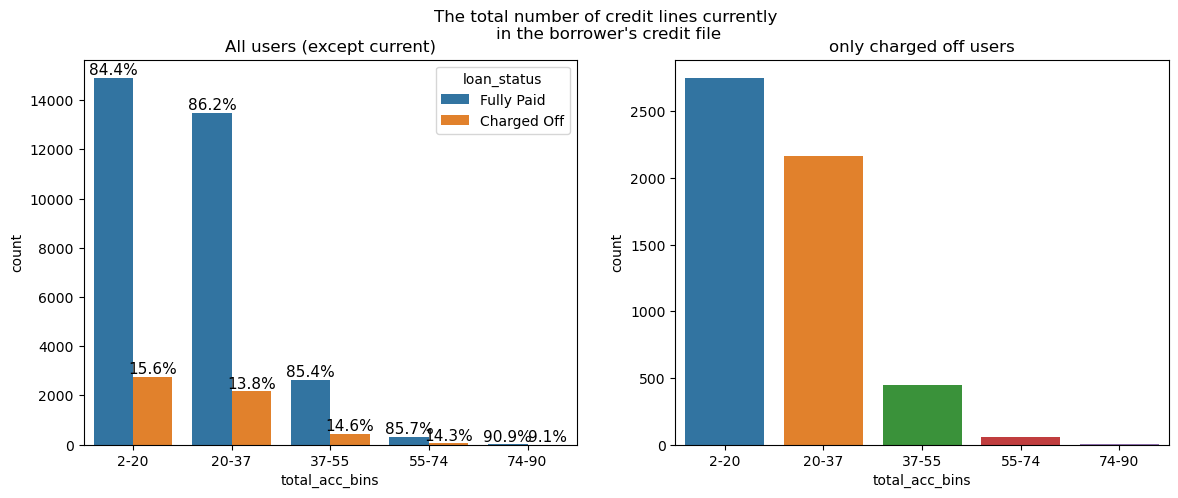

In [210]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle("The total number of credit lines currently \nin the borrower\'s credit file")

axes[0].set_title("All users (except current)")
sns.countplot(ax=axes[0], x="total_acc_bins", data=loan_without_current_df, hue="loan_status")
percentage_above_bar_relative_to_xgroup(axes[0])


axes[1].set_title("only charged off users")
sns.countplot(ax=axes[1], x="total_acc_bins", data=charged_off_users)

#### Employement length (comparing fully paid users to charged off users)
- It is highest when the employemnt length is 10 years or more (17%)
- Other than that, it is revolving around 13-15%

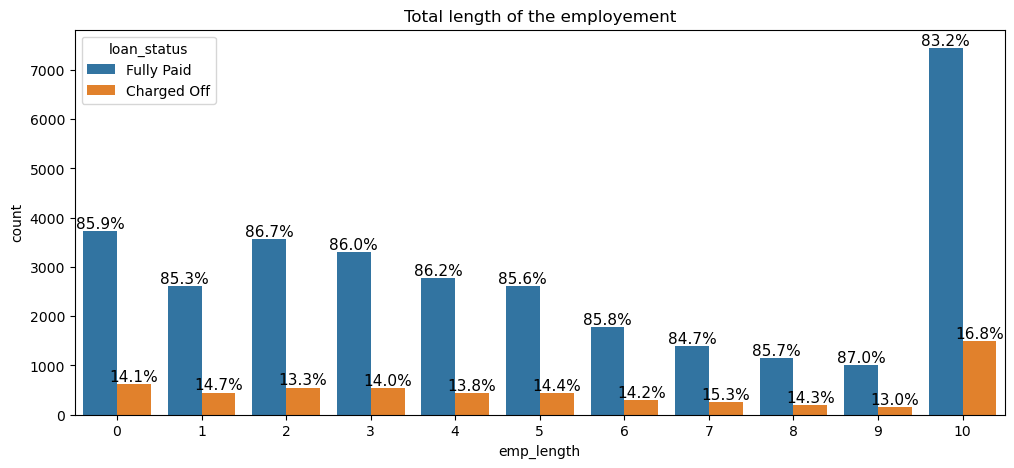

In [172]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x="emp_length", data=loan_without_current_df, hue="loan_status")
ax.set_title('Total length of the employement')
percentage_above_bar_relative_to_xgroup(ax)
plt.show()

#### Loan amount (comparing fully paid users to charged off users)
- Higher the loan amount, more probablity of defaulter
- We observe a positive correlation between the loan amount and user defaulter ratio percentage
- The highest ratio percentage is when loan amount is between 32k-40k
- The grant has negative correlation to loan amount. Lower the amount, higher is the chance of grant hence the count of defaulters for low loan amount is more

<Axes: title={'center': 'only charged off users'}, xlabel='loan_amnt_bins', ylabel='count'>

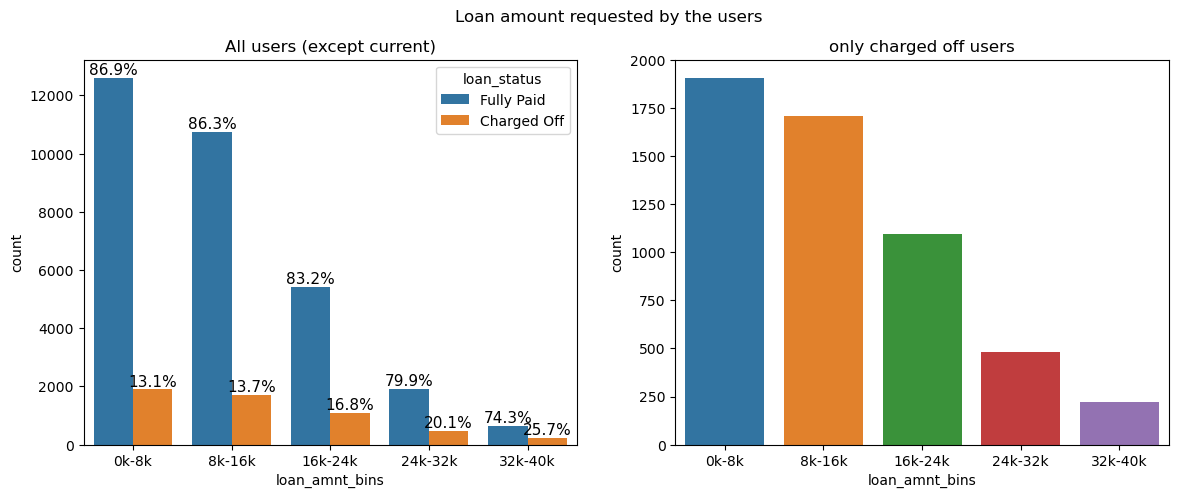

In [211]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle("Loan amount requested by the users")

axes[0].set_title("All users (except current)")
sns.countplot(ax=axes[0], x="loan_amnt_bins", data=loan_without_current_df, hue="loan_status")
percentage_above_bar_relative_to_xgroup(axes[0])


axes[1].set_title("only charged off users")
sns.countplot(ax=axes[1], x="loan_amnt_bins", data=charged_off_users)

#### DTI (comparing fully paid users to charged off users)
- Ratio of defaulter percentage is highest when the dti is between 18-24
- Ratio of defaulter percentage is lowest when the dti is beween 0-6
- Loan defaulter ratio is above 15% when the DTI above 12
- The count of defaulters is highest when the dti is between 12-18

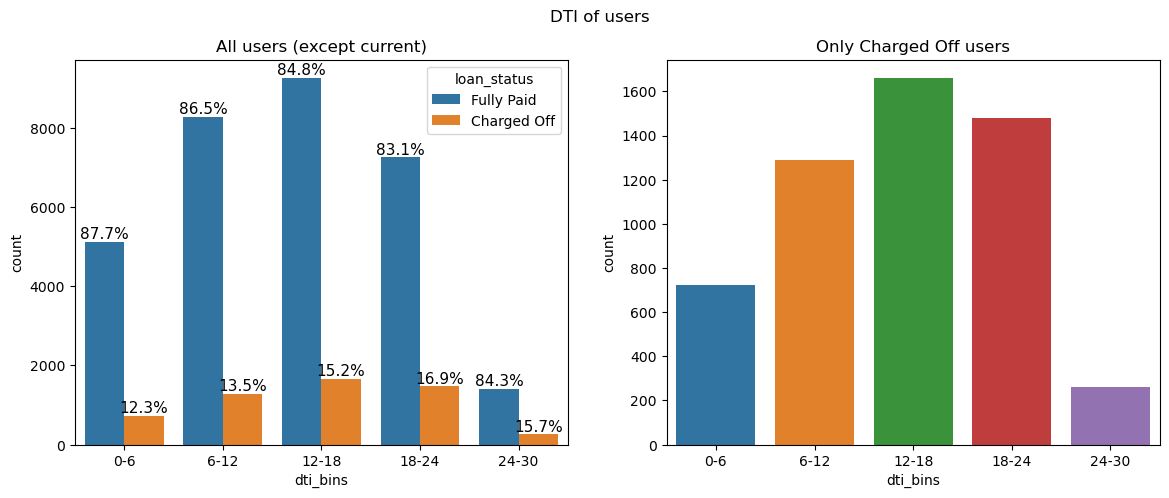

In [213]:
drawSubCountPlot(loan_without_current_df, chaged_off_users, "dti_bins", "loan_status", 
                 "DTI of users", "All users (except current)", "Only Charged Off users")

#### Installment amount (comparing fully paid users to charged off users)
- Ratio of defaulter is highest when the installment is between 520-1050
- Other than that, we are observing a defaulter of 13-15%
- The count of defaulters is highest in 0-270 as the loan grant is high

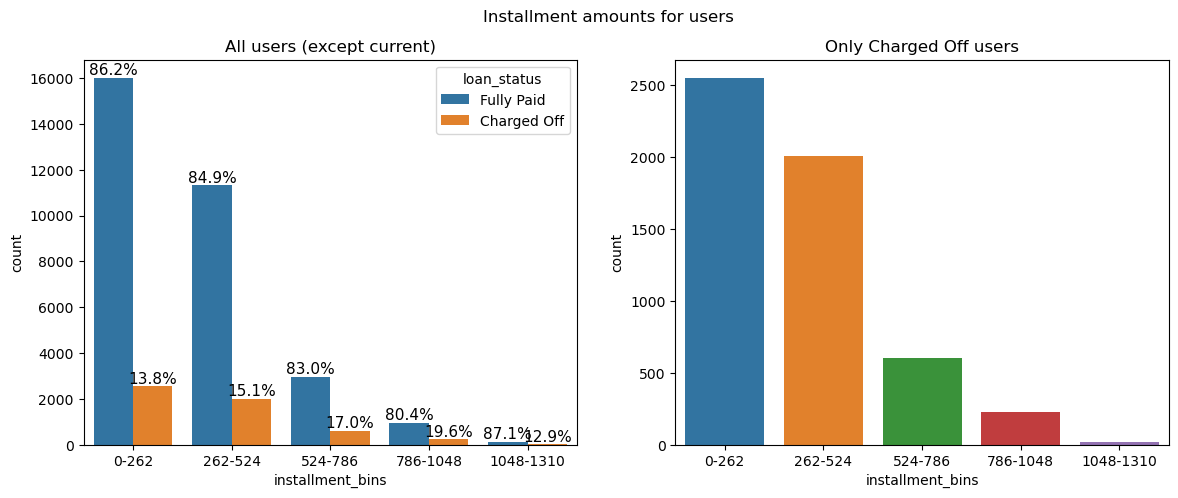

In [214]:
drawSubCountPlot(loan_without_current_df, charged_off_users, "installment_bins", "loan_status", 
                 "Installment amounts for users", "All users (except current)", "Only Charged Off users")

#### Analyzing the data of charged off users for categorical columns

#### Loan term (comparing fully paid users to charged off users)
- The ratio percentage of defaulter is more (26%) when the loan term is more (60 months)
- More users have applied for short duration loan (36 months)

<Axes: title={'center': 'Loan term of only charged off users'}, xlabel='term', ylabel='count'>

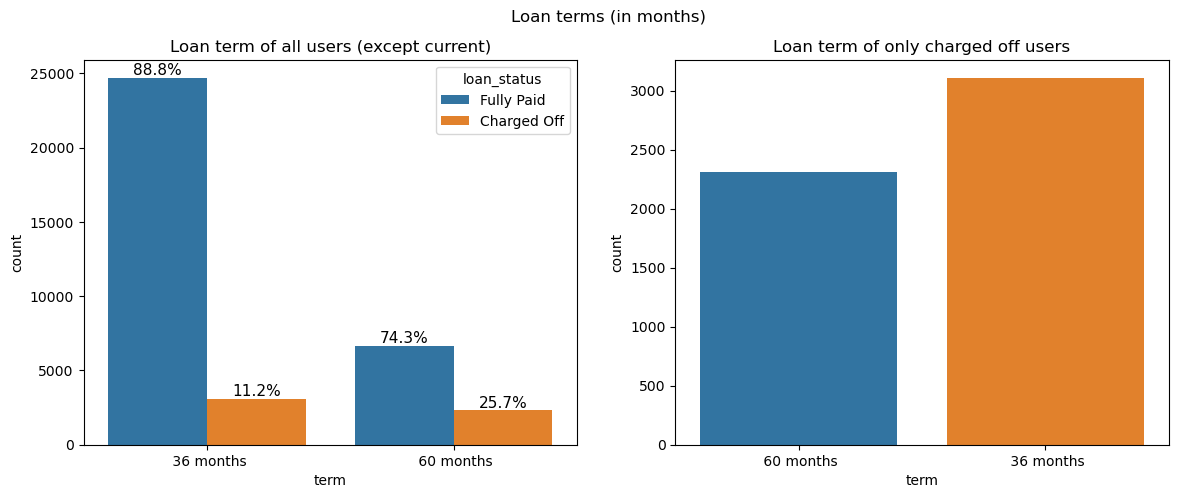

In [197]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle("Loan terms (in months)")

axes[0].set_title("Loan term of all users (except current)")
sns.countplot(ax=axes[0], x="term", data=loan_without_current_df, hue="loan_status")
percentage_above_bar_relative_to_xgroup(axes[0])


axes[1].set_title("Loan term of only charged off users")
sns.countplot(ax=axes[1], x="term", data=charged_off_users)

#### Home ownership (comparing fully paid users to charged off users)
- The ratio of defaulter percentage is highest when the ownership is other
- The highest loan requests came from Rent and Mortgage

<Axes: title={'center': 'Home ownership of only charged off users'}, xlabel='home_ownership', ylabel='count'>

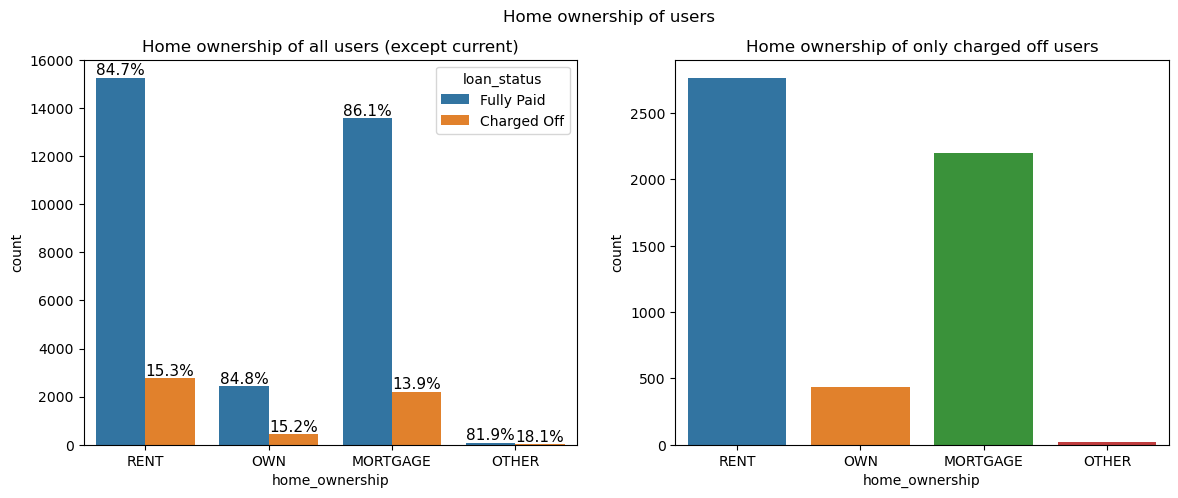

In [199]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle("Home ownership of users")

axes[0].set_title("Home ownership of all users (except current)")
sns.countplot(ax=axes[0], x="home_ownership", data=loan_without_current_df, hue="loan_status")
percentage_above_bar_relative_to_xgroup(axes[0])


axes[1].set_title("Home ownership of only charged off users")
sns.countplot(ax=axes[1], x="home_ownership", data=charged_off_users)

#### Verified source (comparing fully paid users to charged off users)
- More loans were given to not verified
- The count of defaulters is high for not verified, followed by Verfied and then source verified
- The highest ratio defaulter percentage is for verified users

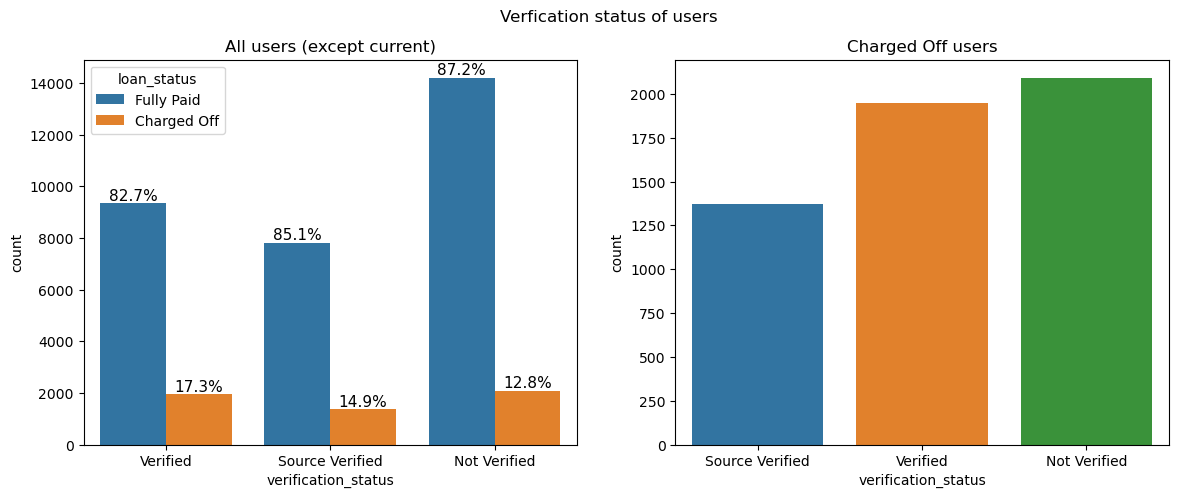

In [216]:
drawSubCountPlot(loan_without_current_df, charged_off_users, "verification_status", "loan_status", 
                 "Verfication status of users", "All users (except current)", "Charged Off users")

#### Purpose of loan (Charged Off users)
- Highest defaulter is observed when the purpose is debt consolidation followed by credit card, small business and others

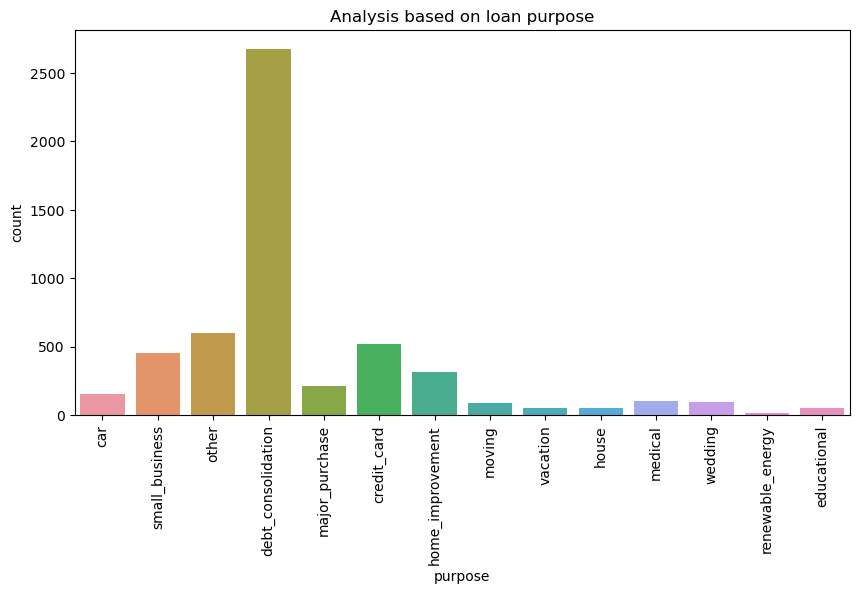

In [202]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="purpose", data=charged_off_users)
ax.set_title('Analysis based on loan purpose')
ax.tick_params(axis='x', rotation=90)
plt.show()

#### Public bankruptcy records (comparing fully paid users to charged off users)
- Ratio percentage of defaulter is higher when the bankruptcy record is high
- Highest number of loans are provided to people with low bankruptcy record

<Axes: title={'center': 'Bankruptcy records of only charged off users'}, xlabel='pub_rec_bankruptcies', ylabel='count'>

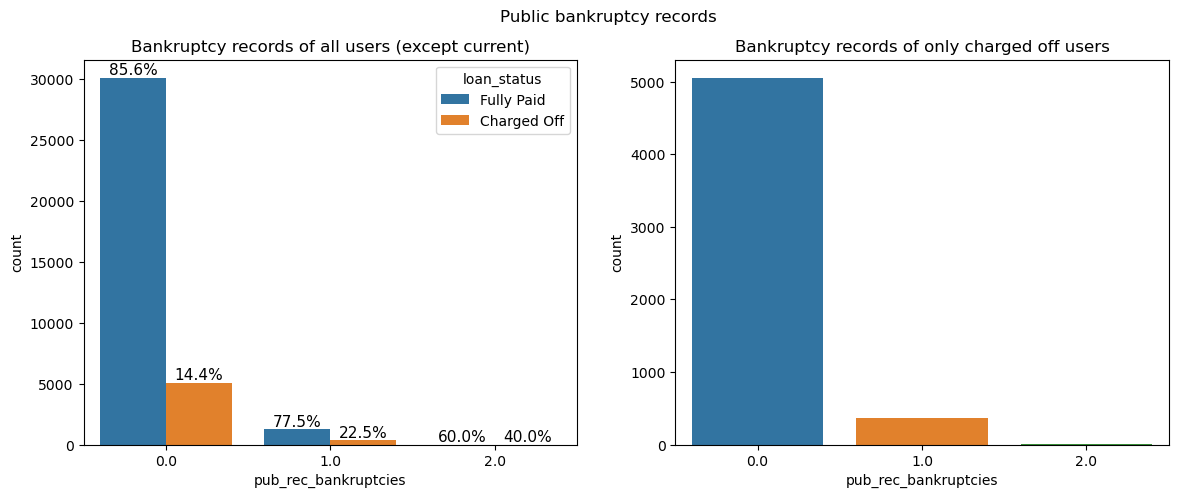

In [201]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle("Public bankruptcy records")

axes[0].set_title("Bankruptcy records of all users (except current)")
sns.countplot(ax=axes[0], x="pub_rec_bankruptcies", data=loan_without_current_df, hue="loan_status")
percentage_above_bar_relative_to_xgroup(axes[0])


axes[1].set_title("Bankruptcy records of only charged off users")
sns.countplot(ax=axes[1], x="pub_rec_bankruptcies", data=charged_off_users)

#### User Grade  (comparing fully paid users to charged off users)
- As the grade decreases the ratio of defaulter percentage increases
- We observe a negative correlation between the grade and the ratio defaulter
- Highest loan request came from user grade A and B

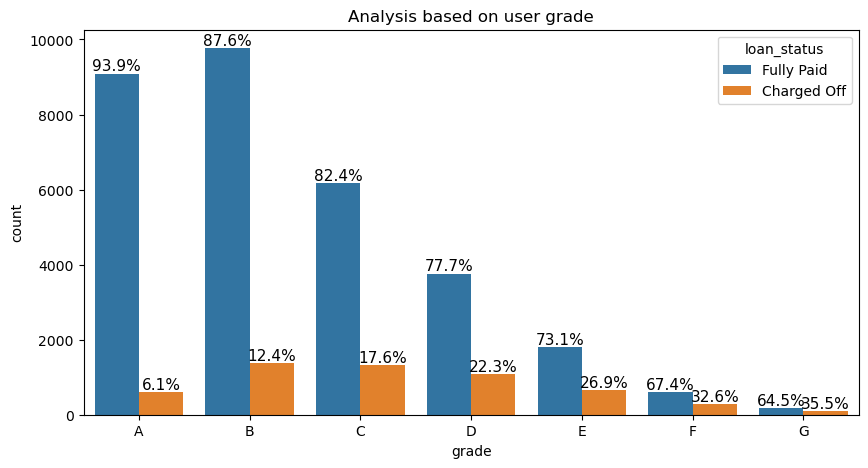

In [204]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="grade", data=loan_without_current_df, hue="loan_status", 
                   order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
ax.set_title('Analysis based on user grade')
percentage_above_bar_relative_to_xgroup(ax)
plt.show()

#### Address State Charged off users
- Highest defaulters are from state CA

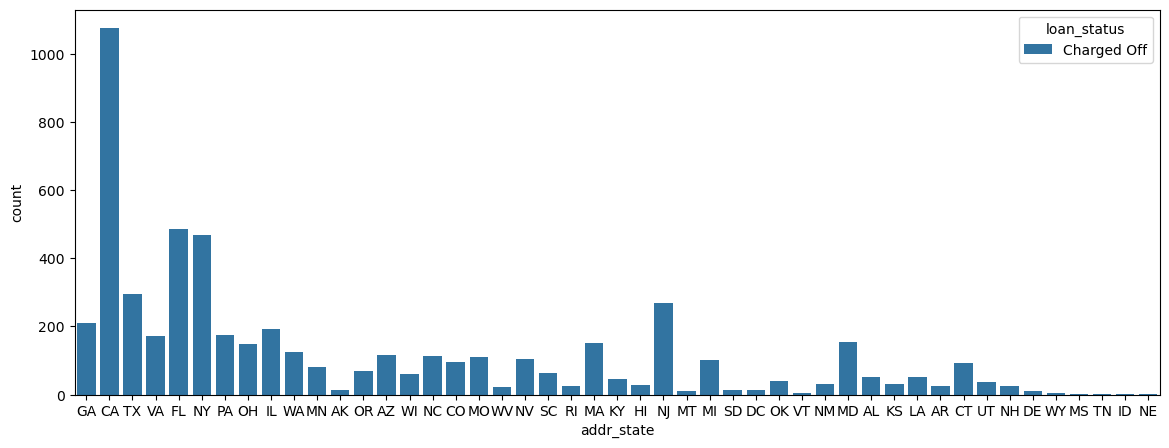

In [236]:
plt.figure(figsize=(14,5))
sns.countplot(x="addr_state", data=charged_off_users, hue="loan_status")
plt.show()

#### Analyzing the charged off based on issue date

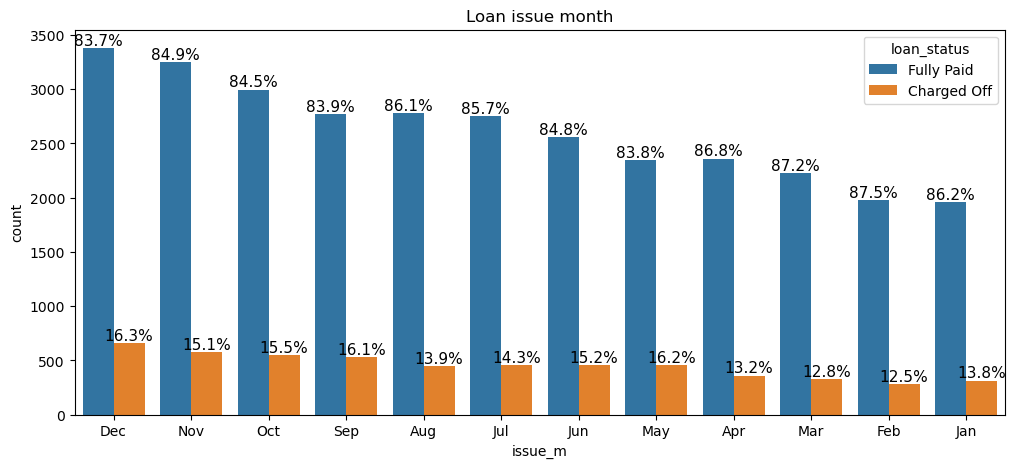

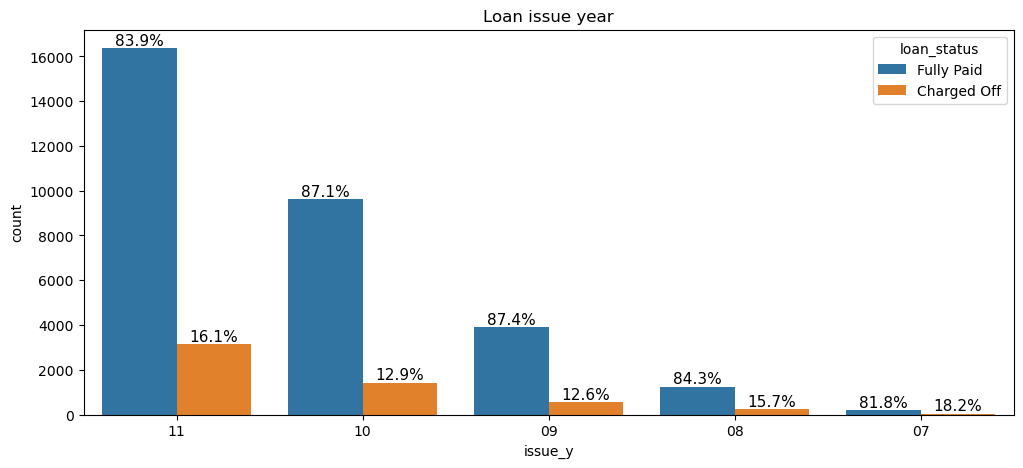

In [161]:
charged_off_users = loan_without_current_df[loan_without_current_df["loan_status"] == "Charged Off"]


plt.figure(figsize=(12,5))
axes = sns.countplot(x="issue_m", data=loan_without_current_df, hue="loan_status")
axes.set_title("Loan issue month")
percentage_above_bar_relative_to_xgroup(axes)

plt.figure(figsize=(12,5))
axes = sns.countplot(x="issue_y", data=loan_without_current_df, hue="loan_status")
axes.set_title("Loan issue year")
percentage_above_bar_relative_to_xgroup(axes)

## Loan defaulter observation
#### With respect to Charged Off users against Fully Paid users, we can conclude that the probablity of loan defaulter is high when:-
- the user's annual income is less. Charged off percentage is highest users with annual income 3K-31K.
- High chances of loan defaulter if the interest rates are high. The defaulter ratio is highest for interest 21-24% when compared against the fully paid users
- Higher the revolving line utilisation rate, higher is the percentage of loan defaulter. The defaulter ratio is found highest for 80-100 bin
- The defaulter percentage is highest when total open accounts are in between 2-20
- The defaulter percentage is highest when emploment length is 10 years or more
- Higher the loan amount, higher is the percentage of loan defaulters. It is in positive corelation to loan amount.
- The loan defaulter percentage is highest when the dti is between 18-24, followed by 24-30 and 12-18.
- Loan defaulter percentage is higher when the installment amount is between 520-1050
- High defaulter percentage when the loan term is more
- Loan is applyed more by rent and mortgage users, however the defaulter ratio percentage is highest for others followed by rent, own and mortgage
- Analysing the purpose of loan. Debt consolidation has the highest percentage of defaulter followed by credit card, small businesses and other
- Looking at the public bankruptcy records, we know that loan defaulter ratio percentage has a positive corelation to bankruptcy
- Analysing the user grade, we can say that as the grade decreases, the ratio percentage of loan defaulters increases

#### Analysing loan defaulters based on the dates
This could be because of the real state crysis that happened in year '08
- Loans grated during the end of the year has higher percetage of loan defaulters
- Loan granted in '07 and '11 has the highest defaulter percetage


## Part 2: Bivariate analysis

### Loan analysis based on annual income comparing with other columns

In [215]:
loan_without_current_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36768 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             36768 non-null  int64   
 1   funded_amnt           36768 non-null  int64   
 2   term                  36768 non-null  object  
 3   int_rate              36768 non-null  float64 
 4   installment           36768 non-null  float64 
 5   grade                 36768 non-null  object  
 6   sub_grade             36768 non-null  object  
 7   emp_length            36768 non-null  int64   
 8   home_ownership        36768 non-null  object  
 9   annual_inc            36768 non-null  float64 
 10  verification_status   36768 non-null  object  
 11  issue_d               36768 non-null  object  
 12  loan_status           36768 non-null  object  
 13  purpose               36768 non-null  object  
 14  addr_state            36768 non-null  object  
 15  dt

#### Loan amount vs Annual income
- High loan is provided when the income is high
- Loan defaulter is more than loan full paid for all annual income buckets
- The displacement of loan amount for loan defaulter is more when annual income is above 85k

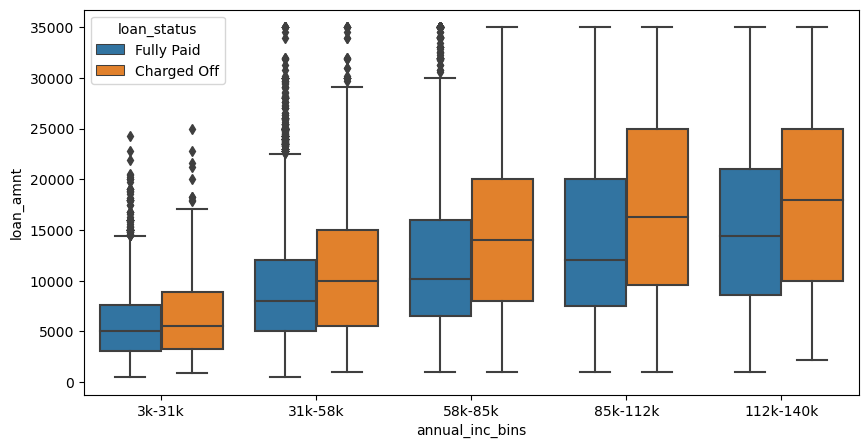

In [132]:
plt.figure(figsize=(10,5))
sns.boxplot(x="annual_inc_bins", y="loan_amnt", data=loan_without_current_df, hue="loan_status")
plt.show()

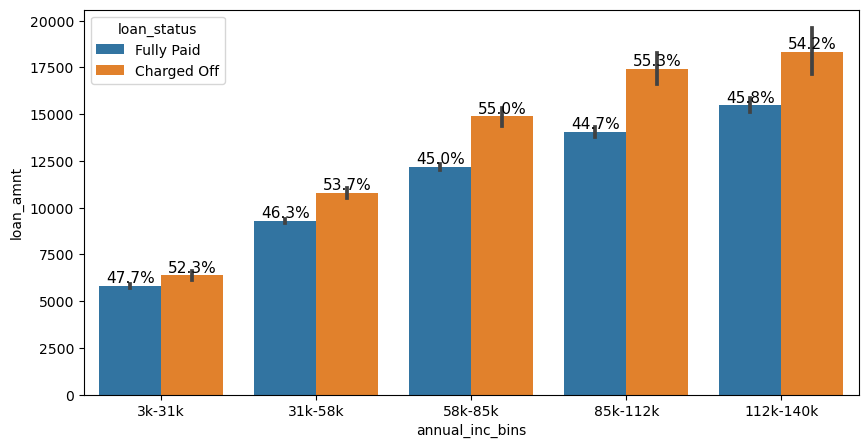

In [133]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="annual_inc_bins", y="loan_amnt", data=loan_without_current_df, hue="loan_status")
percentage_above_bar_relative_to_xgroup(ax)
plt.show()

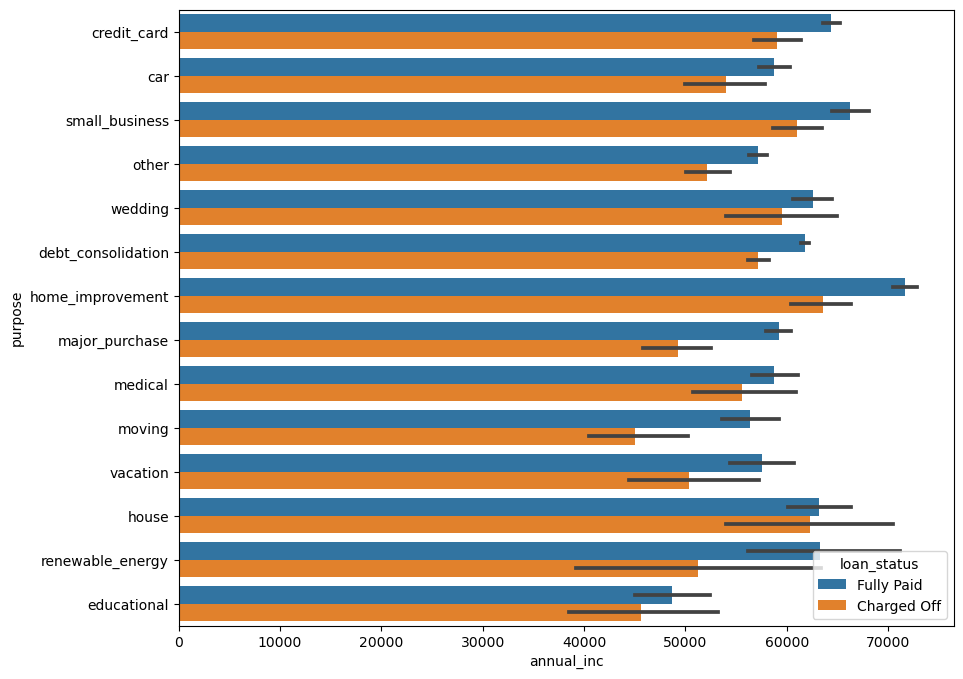

In [135]:
plt.figure(figsize=(10,8))
sns.barplot(x="annual_inc", y="purpose", data=loan_without_current_df, hue="loan_status")
plt.show()

#### Purpose vs Annual income
- Most high annual income users requested for small_business, home_improvement, house, wedding

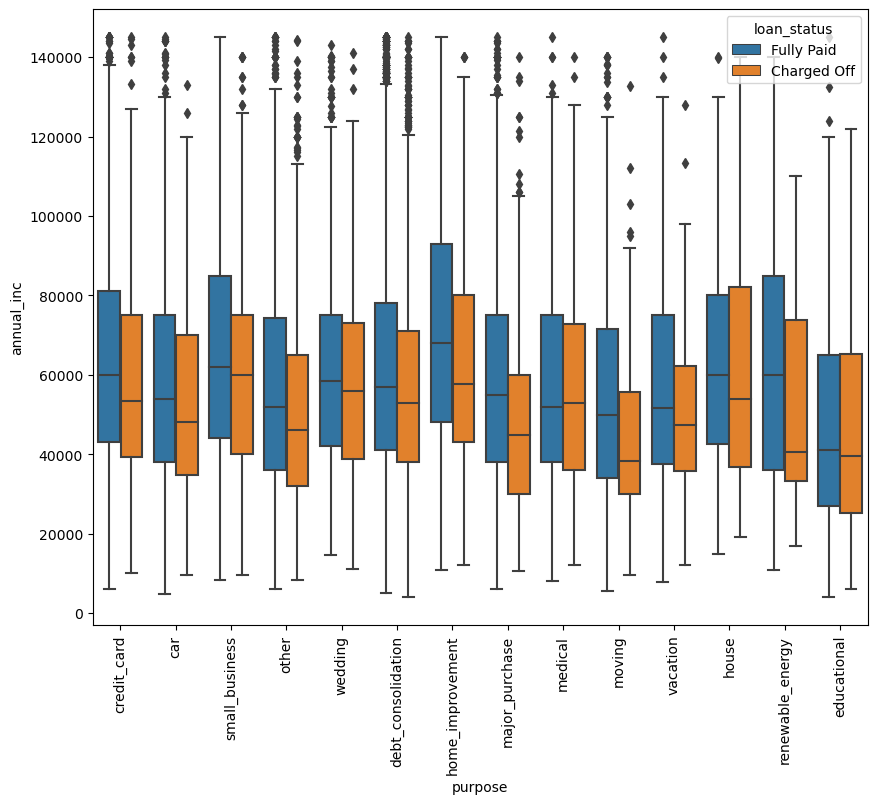

In [137]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(y="annual_inc", x="purpose", data=loan_without_current_df, hue="loan_status")
ax.tick_params(axis='x', rotation=90)
plt.show()

#### Grade vs Annual income
- Grade F and G has the highest annual income
- Also, they have highest loan defaulters

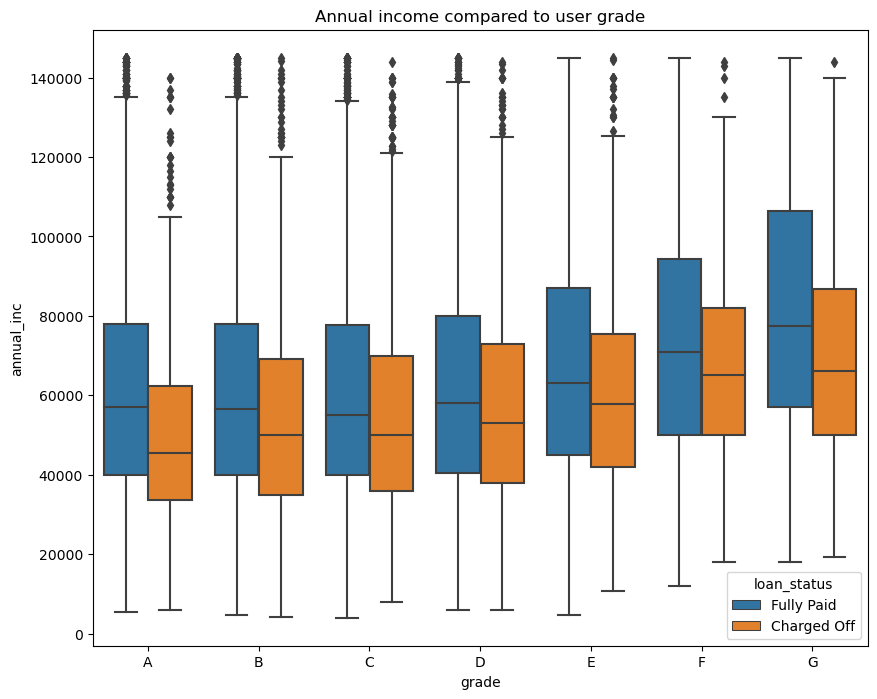

In [141]:
plt.figure(figsize=(10,8))
sns.boxplot(x="grade", y="annual_inc", data=loan_without_current_df, hue="loan_status", 
            order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']).set(title="Annual income compared to user grade")
plt.show()

#### Verification status vs Annual income
- More loans were provided to verified users based on annual income

<Axes: title={'center': 'Public bankruptcy records'}, xlabel='verification_status', ylabel='annual_inc'>

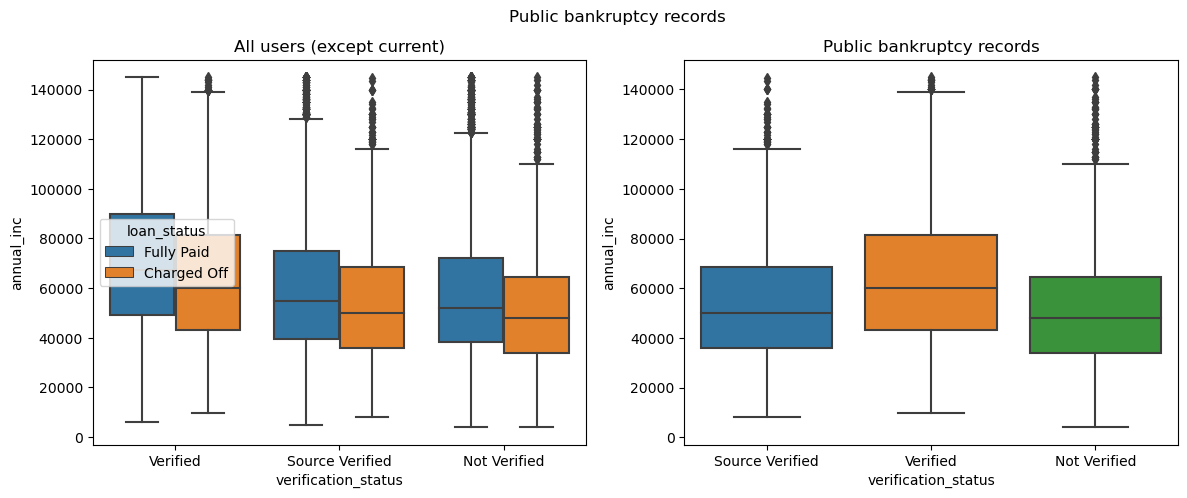

In [223]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle("Public bankruptcy records")

axes[0].set_title("All users (except current)")
sns.boxplot(ax=axes[0], x="verification_status", y="annual_inc", data=loan_without_current_df, hue="loan_status")
percentage_above_bar_relative_to_xgroup(axes[0])


axes[1].set_title("Public bankruptcy records")
sns.boxplot(ax=axes[1], x="verification_status", y="annual_inc", data=charged_off_users)

### Loan vs other columns

#### Loan amount vs purpose
- More loan amount was provided to Grade F and G and also we have higher defaulters there.

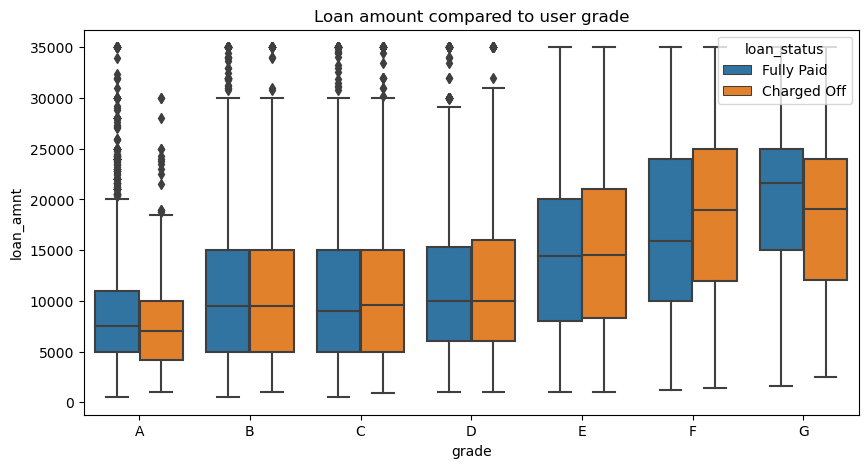

In [144]:
plt.figure(figsize=(10,5))
sns.boxplot(x="grade", y="loan_amnt", data=loan_without_current_df, hue="loan_status", 
            order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']).set(title="Loan amount compared to user grade")
plt.show()

#### Loan amount vs purpose
- Higher loan is provided to small businesses followed by debt consolidation, credit card
- Loan amount for defaulters is high for small businesses followed by debt consolidation, credit card

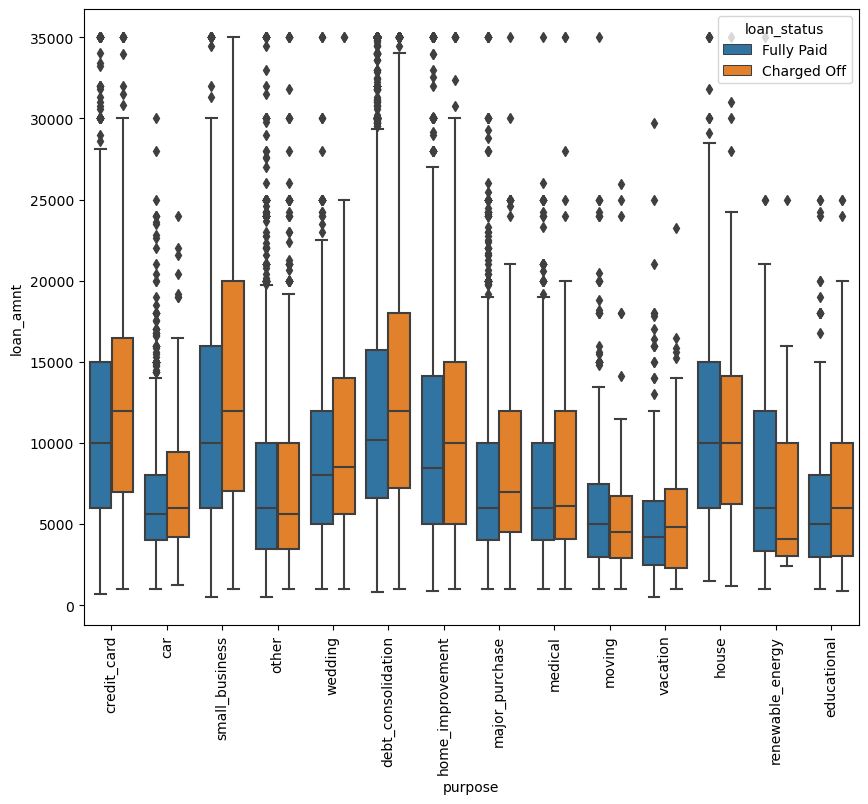

In [147]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(y="loan_amnt", x="purpose", data=loan_without_current_df, hue="loan_status")
ax.tick_params(axis='x', rotation=90)
plt.show()

#### Loan amount vs verification status
- High loan amount was provided to verified users also the loan amount of defaulters is highest there
- Defaulter loan amount order (descending) is verified then source verified and then not verified

<Axes: title={'center': 'Public bankruptcy records'}, xlabel='verification_status', ylabel='loan_amnt'>

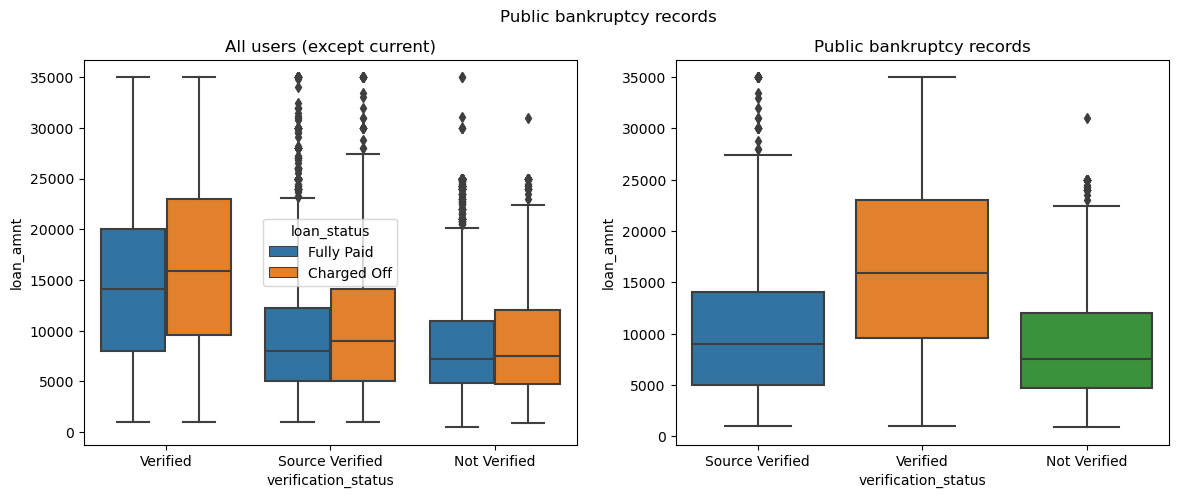

In [224]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle("Public bankruptcy records")

axes[0].set_title("All users (except current)")
sns.boxplot(ax=axes[0], x="verification_status", y="loan_amnt", data=loan_without_current_df, hue="loan_status")
percentage_above_bar_relative_to_xgroup(axes[0])


axes[1].set_title("Public bankruptcy records")
sns.boxplot(ax=axes[1], x="verification_status", y="loan_amnt", data=charged_off_users)

#### Loan amount vs home ownership
- Other ownership has the maximum deisplacement of loan amount
- Mortgage has the highest loan amount defaulters 

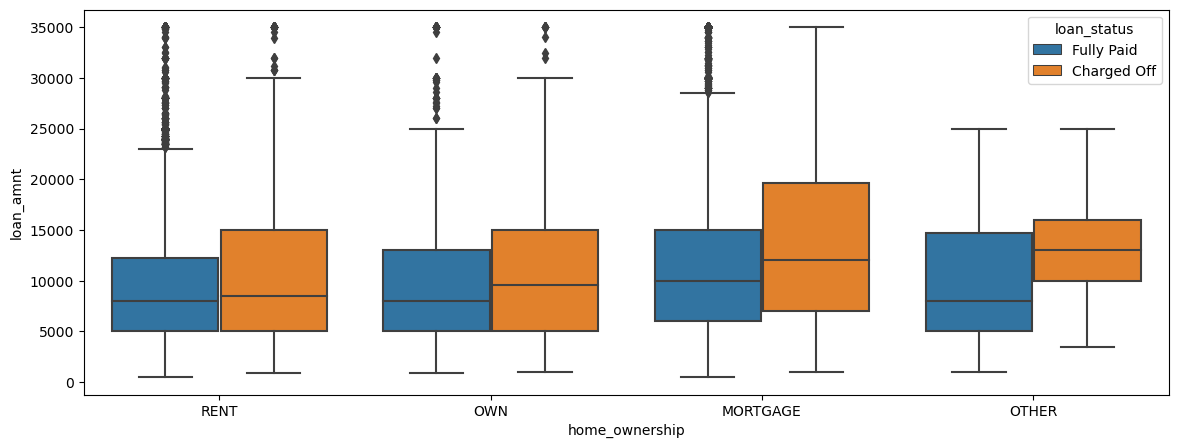

In [241]:
drawBoxPlotXY(loan_without_current_df, "home_ownership", "loan_amnt", "loan_status", 
              "Loan amount vs home ownership", "", "")

#### Loan amount vs interest rate buckets
- Higher the loan, higher is the interest percentage

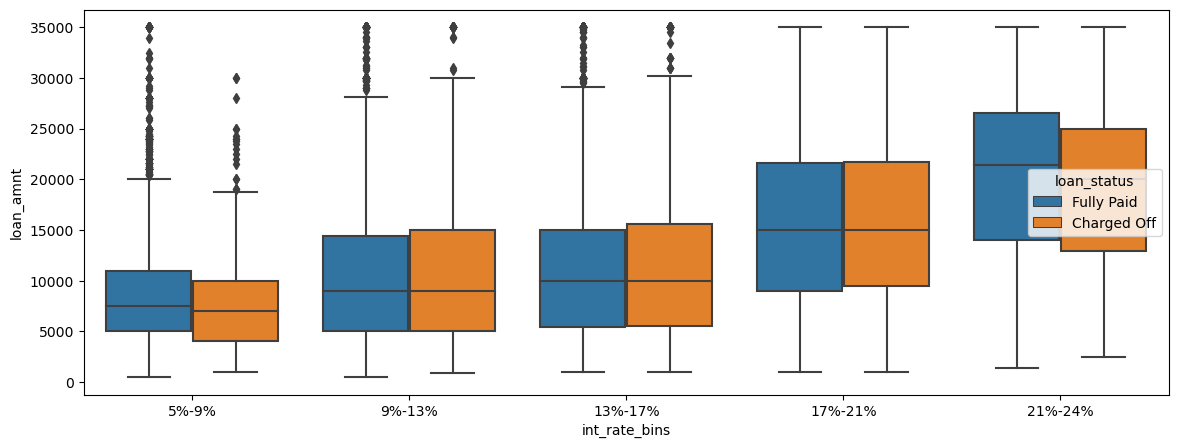

In [243]:
drawBoxPlotXY(loan_without_current_df, "int_rate_bins", "loan_amnt", "loan_status", 
              "Loan amount vs home ownership", "", "")

#### Loan amount vs employment length
- More loan amount is provided to users with higher employment length
- Loan amount provided to defaulter is more for all employment length

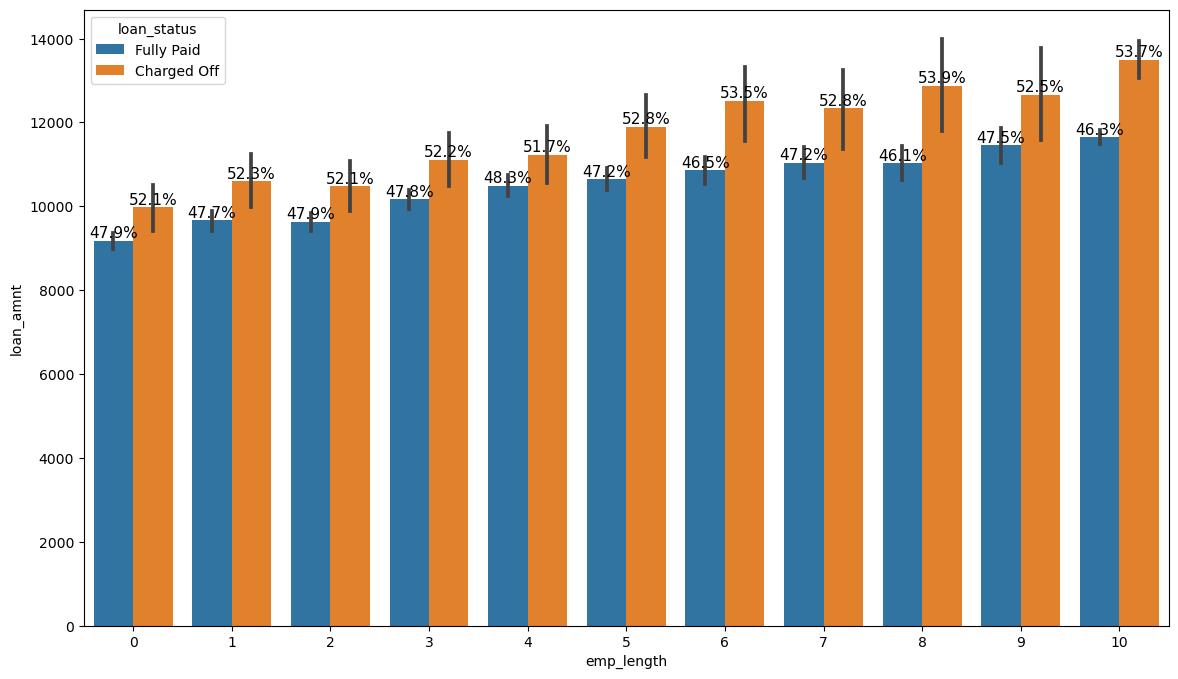

In [247]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x="emp_length", y="loan_amnt", data=loan_without_current_df, hue="loan_status")
percentage_above_bar_relative_to_xgroup(ax)
plt.show()

#### Loan amount vs term
- More loan amount is provided for longer term
- For longer term the defaulter loan amount is more than fully paid

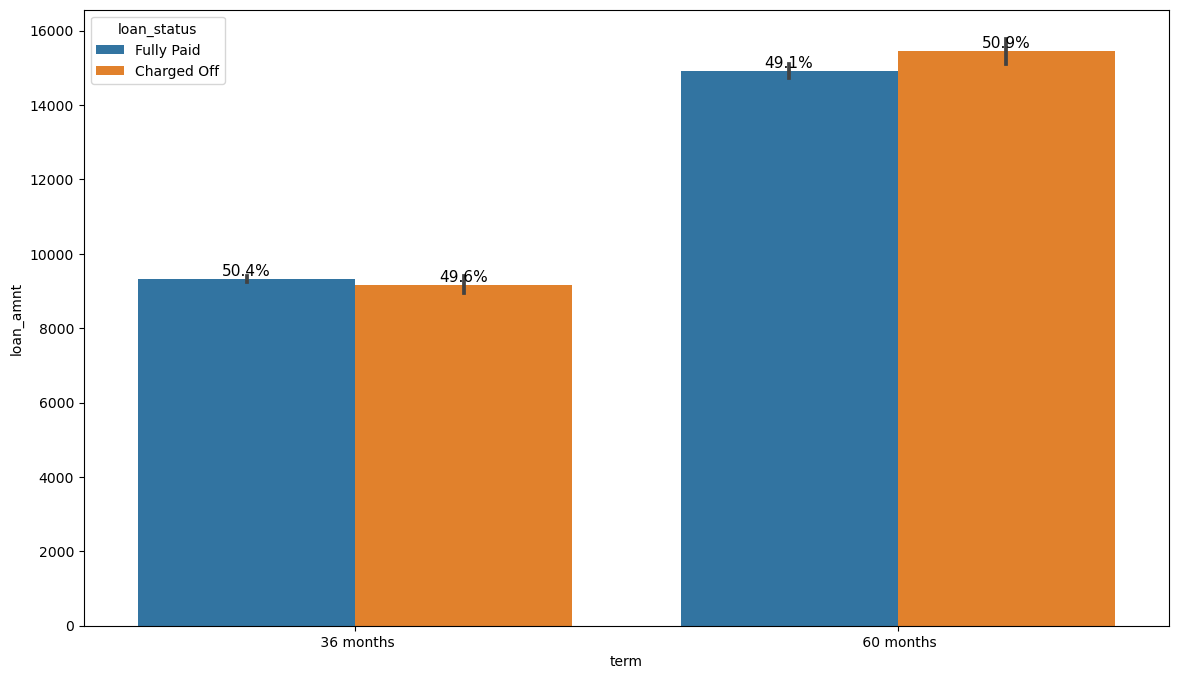

In [249]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x="term", y="loan_amnt", data=loan_without_current_df, hue="loan_status")
percentage_above_bar_relative_to_xgroup(ax)
plt.show()

#### Loan amount vs State
- The highest loan amount defaulters are from WY, MT and AK

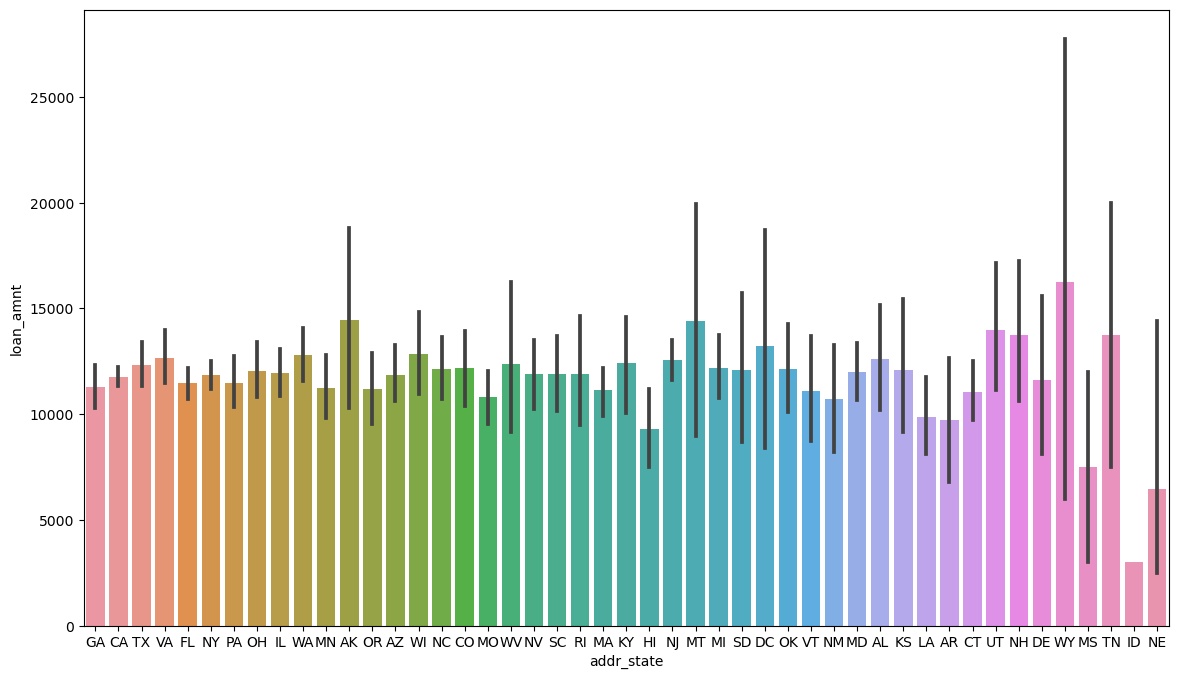

In [253]:
plt.figure(figsize=(14,8))
sns.barplot(x="addr_state", y="loan_amnt", data=charged_off_users)
plt.show()

#### Loan amount vs DTI
- Higher loan amount was provided to users with more dti

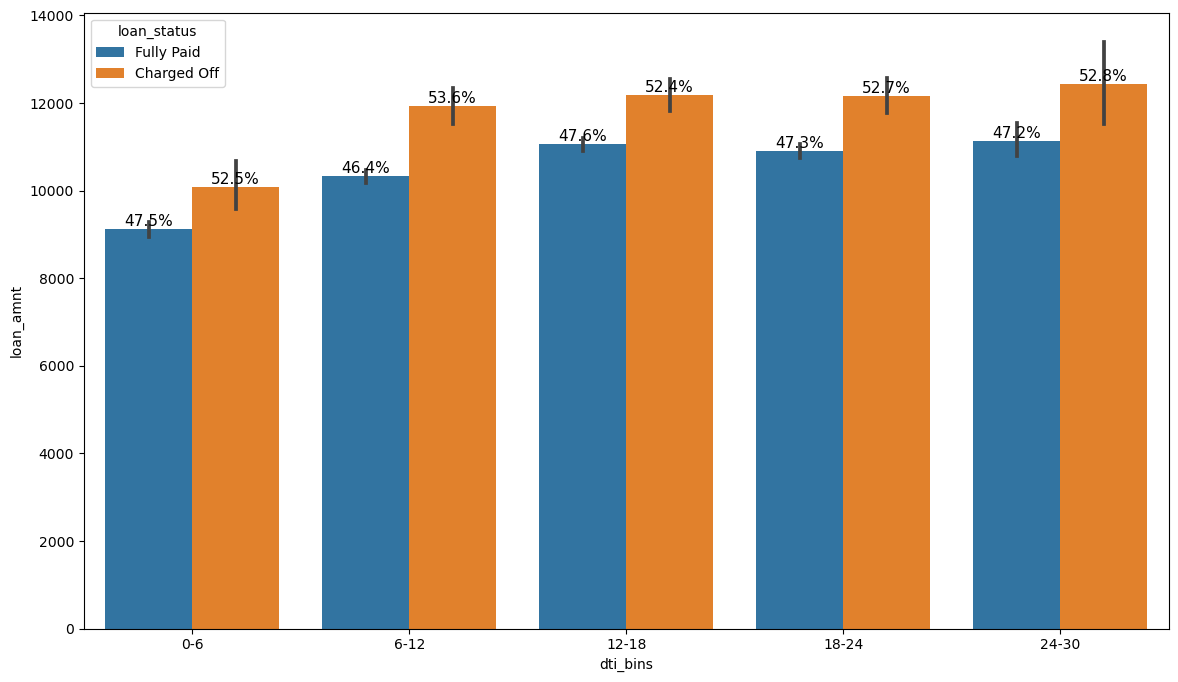

In [258]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x="dti_bins", y="loan_amnt", data=loan_without_current_df, hue="loan_status")
percentage_above_bar_relative_to_xgroup(ax)
plt.show()

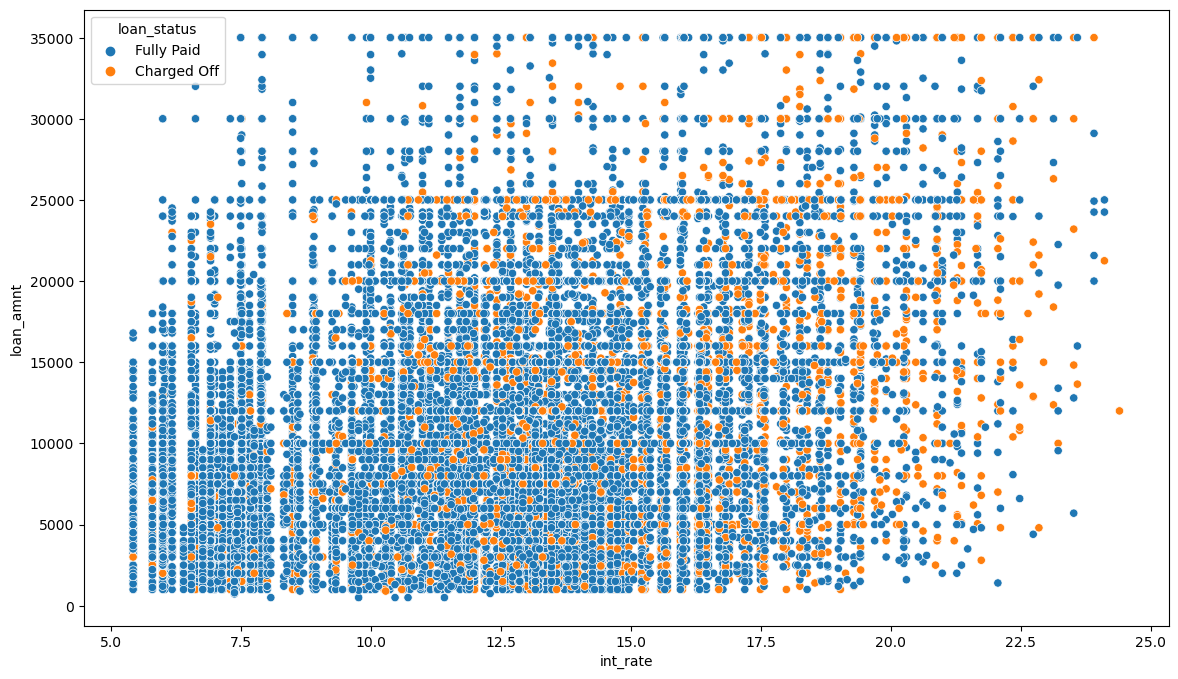

In [263]:
plt.figure(figsize=(14,8))
sns.scatterplot(x="int_rate", y="loan_amnt", data=loan_without_current_df, hue="loan_status")
plt.show()

#### Loan amount vs public record bankruptcy
- Highest loss in loan amount is with users have higher bankruptcy record

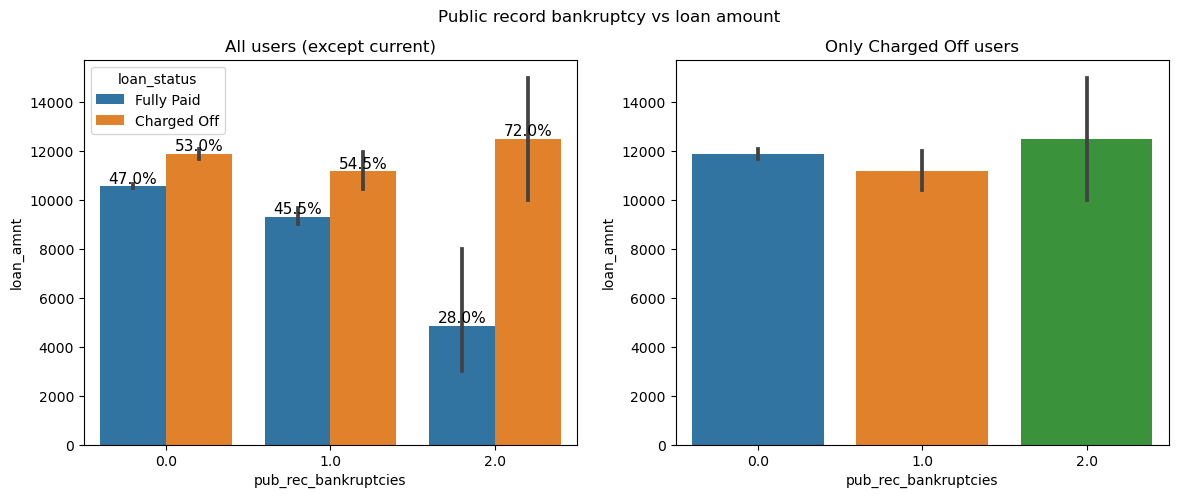

In [272]:

drawSubBarGraphXY(loan_without_current_df, chaged_off_users, "pub_rec_bankruptcies", "loan_amnt", "loan_status", 
                  "Public record bankruptcy vs loan amount", "All users (except current)", "Only Charged Off users")

### Interest rate analysis

#### Interest rate vs home ownership
- High interest rates for defaulters for people across different home ownership 

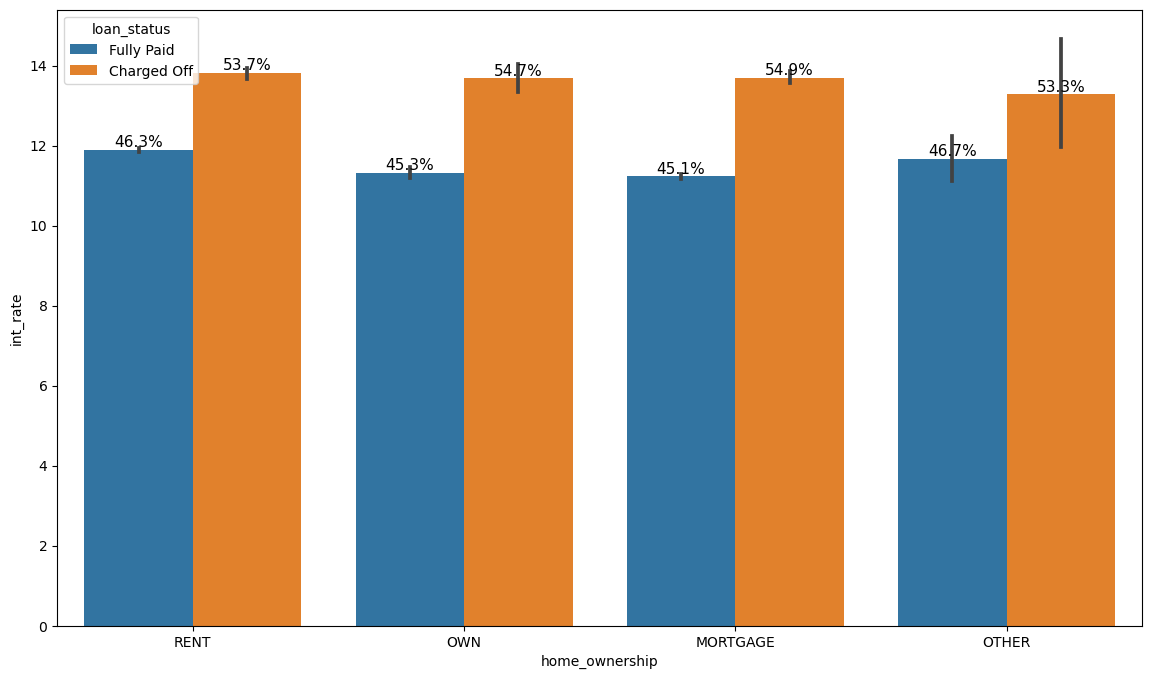

In [265]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x="home_ownership", y="int_rate", data=loan_without_current_df, hue="loan_status")
percentage_above_bar_relative_to_xgroup(ax)
plt.show()

#### Interest rate vs public bankruptcy
- Higher interest rate defaulters for people with more bankruptcy records

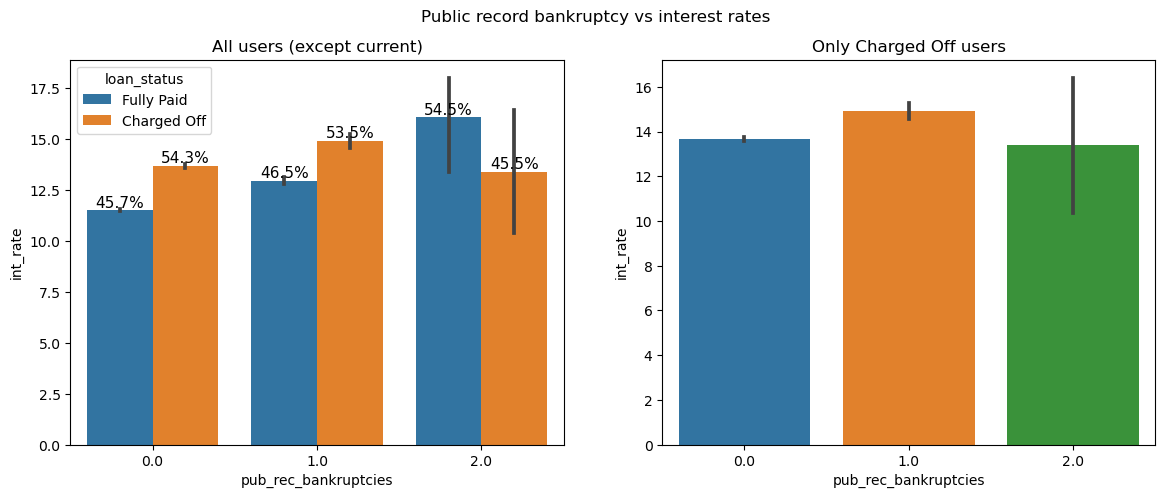

In [273]:
drawSubBarGraphXY(loan_without_current_df, chaged_off_users, "pub_rec_bankruptcies", "int_rate", "loan_status", 
                  "Public record bankruptcy vs interest rates", "All users (except current)", "Only Charged Off users")

## Bivariate analysis observations
#### Different comparisions done against loan amount, annual income and interest rate columns and here are some proposal to avoid defaulters
- High loan should be provided to people with higher income
- More defaulters with 